# Projet 4 - Notebook 2 - Anticipez les besoins en consommation électrique de bâtiments
**Problématique**
  Nous travaillons pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons **tenter de prédire les émissions de GES et la consommation totale d’énergie** de bâtiments pour lesquels elles n’ont pas encore été mesurées.
Notre prédiction se base sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction, …)
Nous cherchons également à évaluer l’intérêt de l’"[ENERGY STAR Score](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv)" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement.

&nbsp;
**Mission**
  1. Réaliser une courte analyse exploratoire.
  2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

&nbsp;
**Interprétation et mise en œuvre**
  1. Recherche de modélisation des émissions de GES et de la consommation totale d’énergie à partir des données de l’échantillon en utilisant le machine learning (apprentissage supervisé).
  2. Examen de l’importance de l’“ENERGY STAR Score” sur la prédiction des émissions de GES pour en évaluer l’intérêt, en examinant la performance de la modélisation avec ou sans cette donnée, et, le cas échéant, le poids de cette donnée dans la modélisation.
  3. Conclusion sur la possibilité de généralisation en fonction du niveau de performance de la modélisation et de la nécessité d’utilisation ou pas de l’“ENERGY STAR Score”.

## Livrables
Ce projet est mené en langage Python, utilisant principalement les librairies Numpy, Pandas, Matplotlib et Seaborn.
Les librairies utilisées pour le machine learning (Notebook 2) sont scikit-learn et xgboost.
Les versions sont vérifiées en début de script de ce Notebook.
L'IDE utilisé est Pycharm.

Le rapport est constitué des fichiers suivants :
- Notebook 1 d'analyse exploratoire : <font color='green'>Pelec_01_notebook_analyse_exploratoire.ipynb</font>
- Notebook 2 de test des modèles : <font color='green'>Pelec_02_tests_modeles.ipynb</font>
- Présentation en support de la soutenance : <font color='green'>Pelec_03_presentation.pdf</font>
- Fichier des fonctions Python utilisées par les notebooks : <font color='green'>Pelec_04_fonctions.py</font>

<a id="sommaire"></a>
## Sommaire
1 - [**Initialisations**: import des librairies, initialisations et chargement du jeu de données](#init)

2 - [**Cibles de modélisation, découpages du jeu de données et examen des données**](#dataset)

3 - [**Processus de modélisation**](#process)
  1. [Liste des modèles testés](#model_list)
  2. [Recherche et évaluation du meilleur modèle](#eval_process)

4 - **Modèle de baseline**
  1. [Random](#random)
  2. [DummyRegressor](#dummyreg)

5 - **Modèles linéaires**
  1. [Ridge](#ridge)
  2. [Lasso](#lasso)
  3. [Elastic net](#elasnet)

6 - **Modèles non linéaires**
  1. [SVM à noyau](#krsvm)
  2. [Ridge à noyau](#krr)
  3. [MLP - Réseau de neurones](#mlp)

7 - **Méthodes ensemblistes**
  1. [Random forest](#random_forest)
  2. [Adaboost](#adaboost)
    2.1 [Modélisation AdaBoost avec recherche du meilleur score](#adaboost)
    2.2 [Evaluation de l'erreur du modèle](#adaboost_err)
    2.3 [Exploration de la réduction du gap entre le score d'entrainement et le score de validation](#adaboost_gap)

  3. [XGBoost](#xgboost)

8 - **Bilan et conclusion**
  1. [Bilan](#bilan)
  2. [Conclusion](#conclusion)

<a id="init"></a>
## 1 - Initialisations: import des librairies, initialisations et chargement du jeu de données

In [1]:
# Import des librairies et fonctions
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import timeit
#start_time = timeit.default_timer()
#elapsed = timeit.default_timer() - start_time
#print("time {:.2f}s".format(elapsed))

import nltk
import copy
import sys

import Pelec_04_fonctions as fct

# Pour afficher les graphiques dans le Notebook
%matplotlib inline
# Pour afficher les graphiques dans une fenêtre matplotlib
#%matplotlib qt

# Gestion des conflits d'installation de ipython et jupyter:
# - installer pipwin (pip install pipwin), puis
# - installer ipython et jupyter avec pipwin

# Display options
from IPython.display import display, display_html, display_png, display_svg, Image
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 199)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Colorama
from colorama import Fore, Back, Style
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL

# Affiche les versions de Python et packages
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      'Versions de Python et principales librairies utilisées :\n' +
      Style.RESET_ALL)
print('- Python : ' + sys.version)
print('- Numpy : ' + np.__version__)
print('- Pandas : ' + pd.__version__)
print('- Sklearn : ' + nltk.__version__)
print('- Matplotlib : ' + mpl.__version__)
print('- Seaborn : ' + sns.__version__)
#print('- Jupyter:')
#!jupyter --version

Versions de Python et principales librairies utilisées :

- Python : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:50:36) [MSC v.1929 64 bit (AMD64)]
- Numpy : 1.23.4
- Pandas : 1.5.1
- Sklearn : 3.6.7
- Matplotlib : 3.6.2
- Seaborn : 0.12.1


In [2]:
# Répertoire et fichier de données
dir_data = ".\Pelec_05_data"
file_data = "building-energy-benchmarking-transformed"

# Répertoire des figures
dir_fig = ".\Pelec_06_figures"

# Chargement du jeu de données
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Chargement du jeu de données '{file_data}.csv'\n" + Style.RESET_ALL)
data = pd.read_csv(dir_data + "\\" + file_data + ".csv", sep=';',
                   encoding='utf-8-sig', index_col=None, low_memory=False)
display(data.info())

Chargement du jeu de données 'building-energy-benchmarking-transformed.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OSEBuildingID        3396 non-null   int64  
 1   PropertyName         3396 non-null   object 
 2   Latitude             3396 non-null   float64
 3   Longitude            3396 non-null   float64
 4   YearBuilt            3396 non-null   float64
 5   NumberofFloors       3396 non-null   float64
 6   Bank_use             3396 non-null   float64
 7   Care Facility_use    3396 non-null   float64
 8   Courthouse_use       3396 non-null   float64
 9   Dormitory_use        3396 non-null   float64
 10  Hospitals_use        3396 non-null   float64
 11  Hotels_use           3396 non-null   float64
 12  Medical Office_use   3396 non-null   float64
 13  Office_use           3396 non-null   float64
 14  Parking_use

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dataset"></a>
## 2 - Cibles de modélisation, découpages du jeu de données et examen des données
Les données ont été préparées pour le machine learning dans le premier Notebook. Leur présentation dans cette section a pour objet de faire le bilan de ces opérations de preprocessing et en visualiser la pertinence. On notera en particulier que les variables ont été normalisées (MinMax) après avoir été transformées pour assurer une bonne répartition (skew et kurtosis optimisés dans le Notebook 1).

Compte tenu de la problématique de ce projet, nous cherchons à réaliser 3 modélisations :
- SiteEnergyUse ;
- TotalGHGEmissions sans ENERGYSTARScore comme variable d'entrée ;
- TotalGHGEmissions avec ENERGYSTARScore comme variable d'entrée.

Pour chacune de ces modélisations, nous découpons le jeu de données avec 80% des données pour le jeu d'entrainement et 20% pour le jeu de test.
À noter que le nombre de données disponibles étant plus faible pour la 3ème cible (émissions de GES avec la variable EnergyStarScore), la taille des jeux d'entrainement et de test est réduite en proportion.

Pour effectuer la recherche sur grille, nous fixons les 3 paramètres suivants :
- Nombre de validations croisées : CV = 4 ;
- Métrique d'optimisation de la recherche sur grille : Scoring = 'neg_mean_squared_error' ;
- Nombre de tâches s'exécutant en parallèle : n_jobs = -1 (tous les processeurs disponibles).

Par ailleurs, les modèles utiliseront autant que possible le paramètre random_state=0 (certains n'en disposent pas, comme SVR et kRR).

Jeu de donnée pour la modélisation de 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' sans utilisation de 'ENERGYSTARScore'

► Dimensions des données X : (3396, 22)

► Représentation graphique des données :


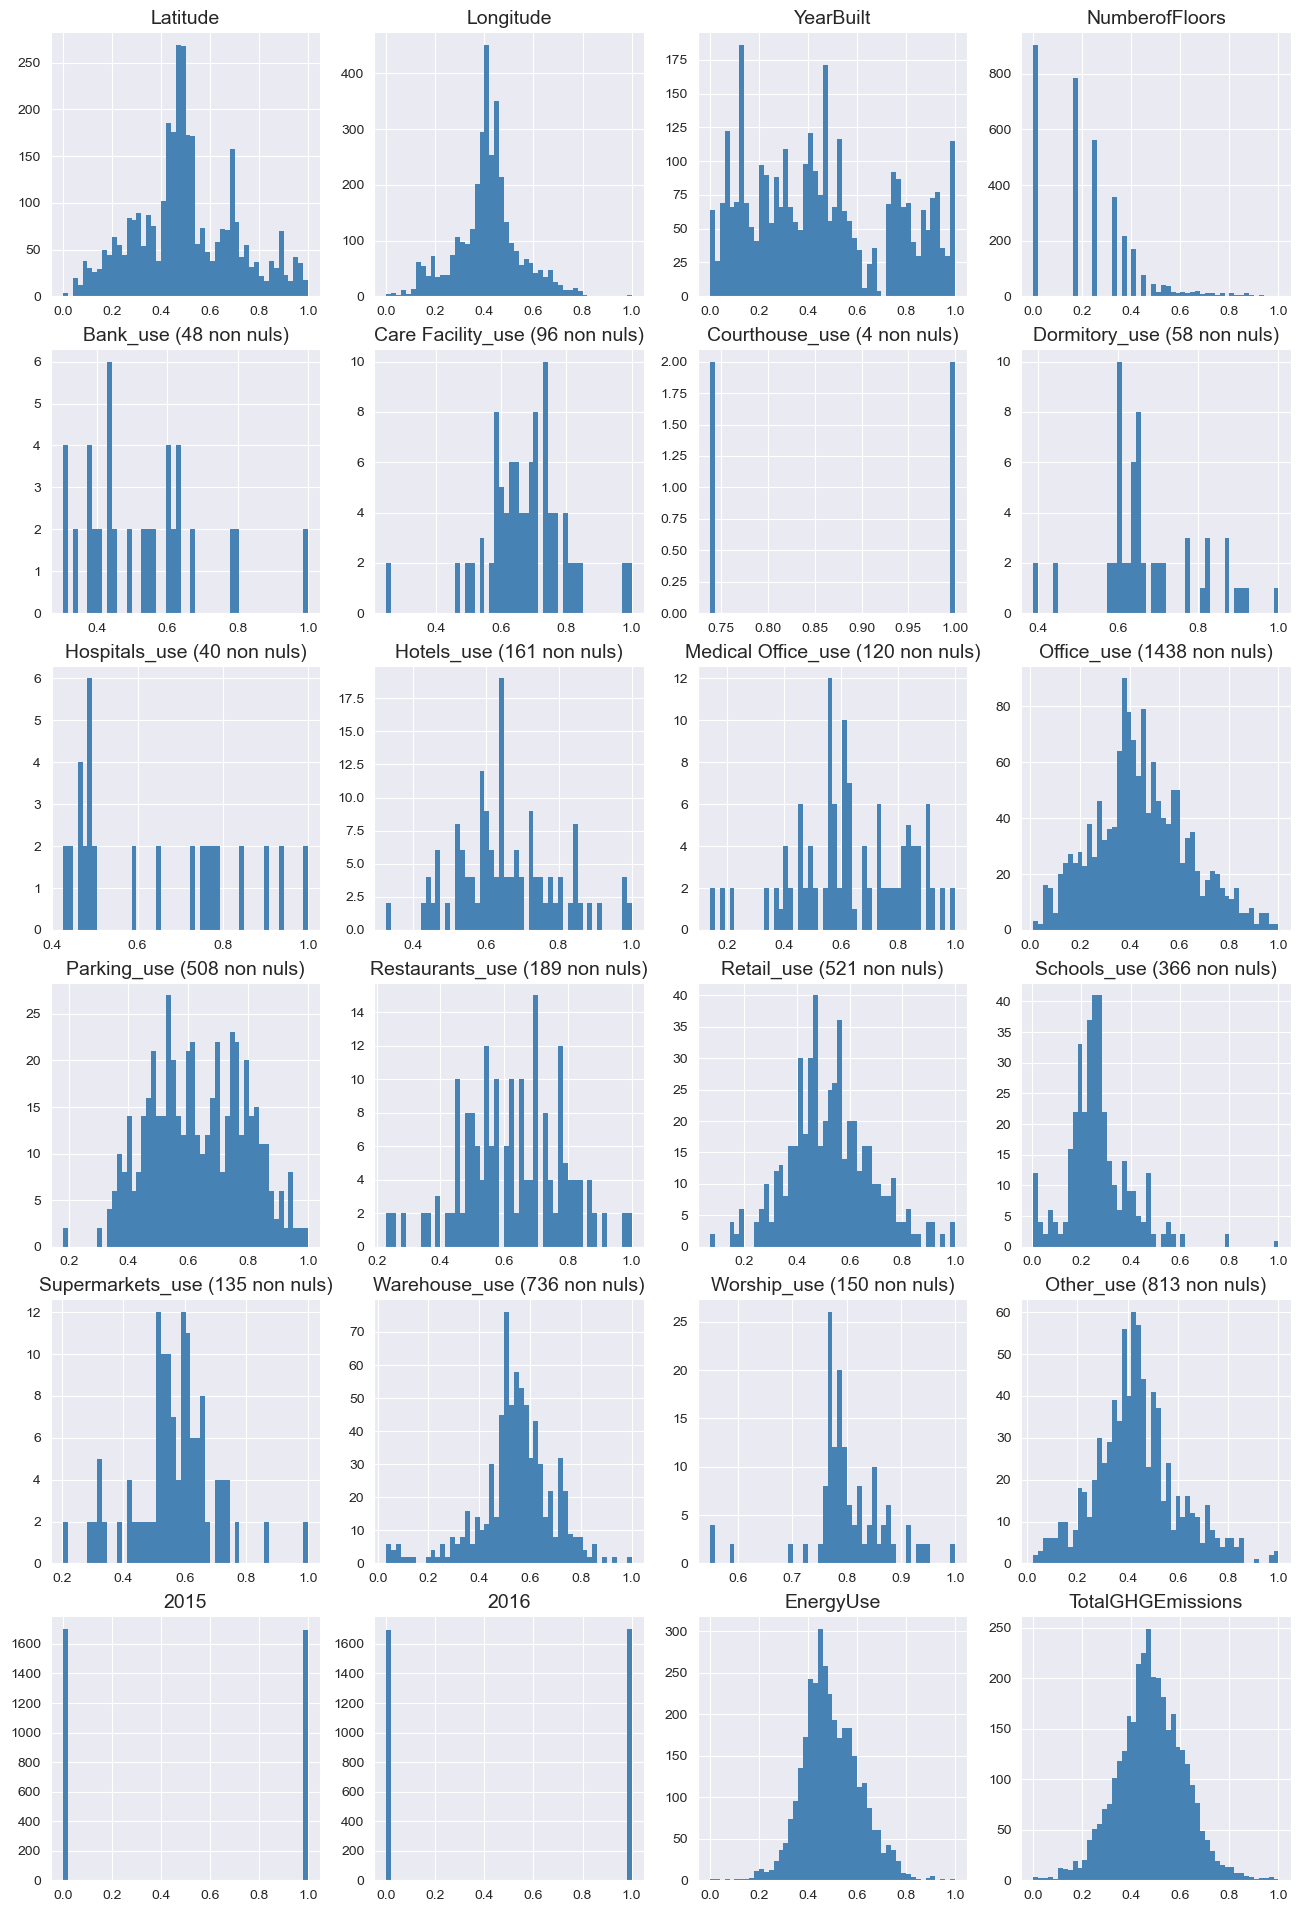

In [3]:
# Données sans utilisation de 'ENERGYSTARScore'
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Jeu de donnée pour la modélisation de 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' sans utilisation de 'ENERGYSTARScore'\n"
      + Style.RESET_ALL)
X = data[data.columns[2:-3]].values
fX_names = data[data.columns[2:-3]].columns
y = data['SiteEnergyUse(kBtu)'].values
z = data['TotalGHGEmissions'].values
print(Fore.GREEN + "► Dimensions des données X :" + Style.RESET_ALL, f"{X.shape}\n")

# Représentation graphique des données X
fig = plt.figure(figsize=(16, 24))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    if (feat_idx<4) or (feat_idx>19):
        h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=False, edgecolor='none')
        ax.set_title(f"{fX_names[feat_idx]}", fontsize=14)
    else:
        h = ax.hist(np.delete(X[:, feat_idx], np.where(X[:, feat_idx]==0)), bins=50, color='steelblue', density=False, edgecolor='none')
        ax.set_title(f"{fX_names[feat_idx]} ({np.count_nonzero(X[:, feat_idx])} non nuls)", fontsize=14)
ax = fig.add_subplot(6,4, 23)
h = ax.hist(y, bins=50, color='steelblue', density=False, edgecolor='none')
ax.set_title("EnergyUse", fontsize=14)
ax = fig.add_subplot(6,4, 24)
h = ax.hist(z, bins=50, color='steelblue', density=False, edgecolor='none')
ax.set_title("TotalGHGEmissions", fontsize=14)
print(Fore.GREEN + "► Représentation graphique des données :" + Style.RESET_ALL)
plt.show()

Jeu de donnée pour la modélisation de 'TotalGHGEmissions' avec utilisation de 'ENERGYSTARScore'

► Dimensions des données Xe : (2280, 23)

► Représentation graphique des données :


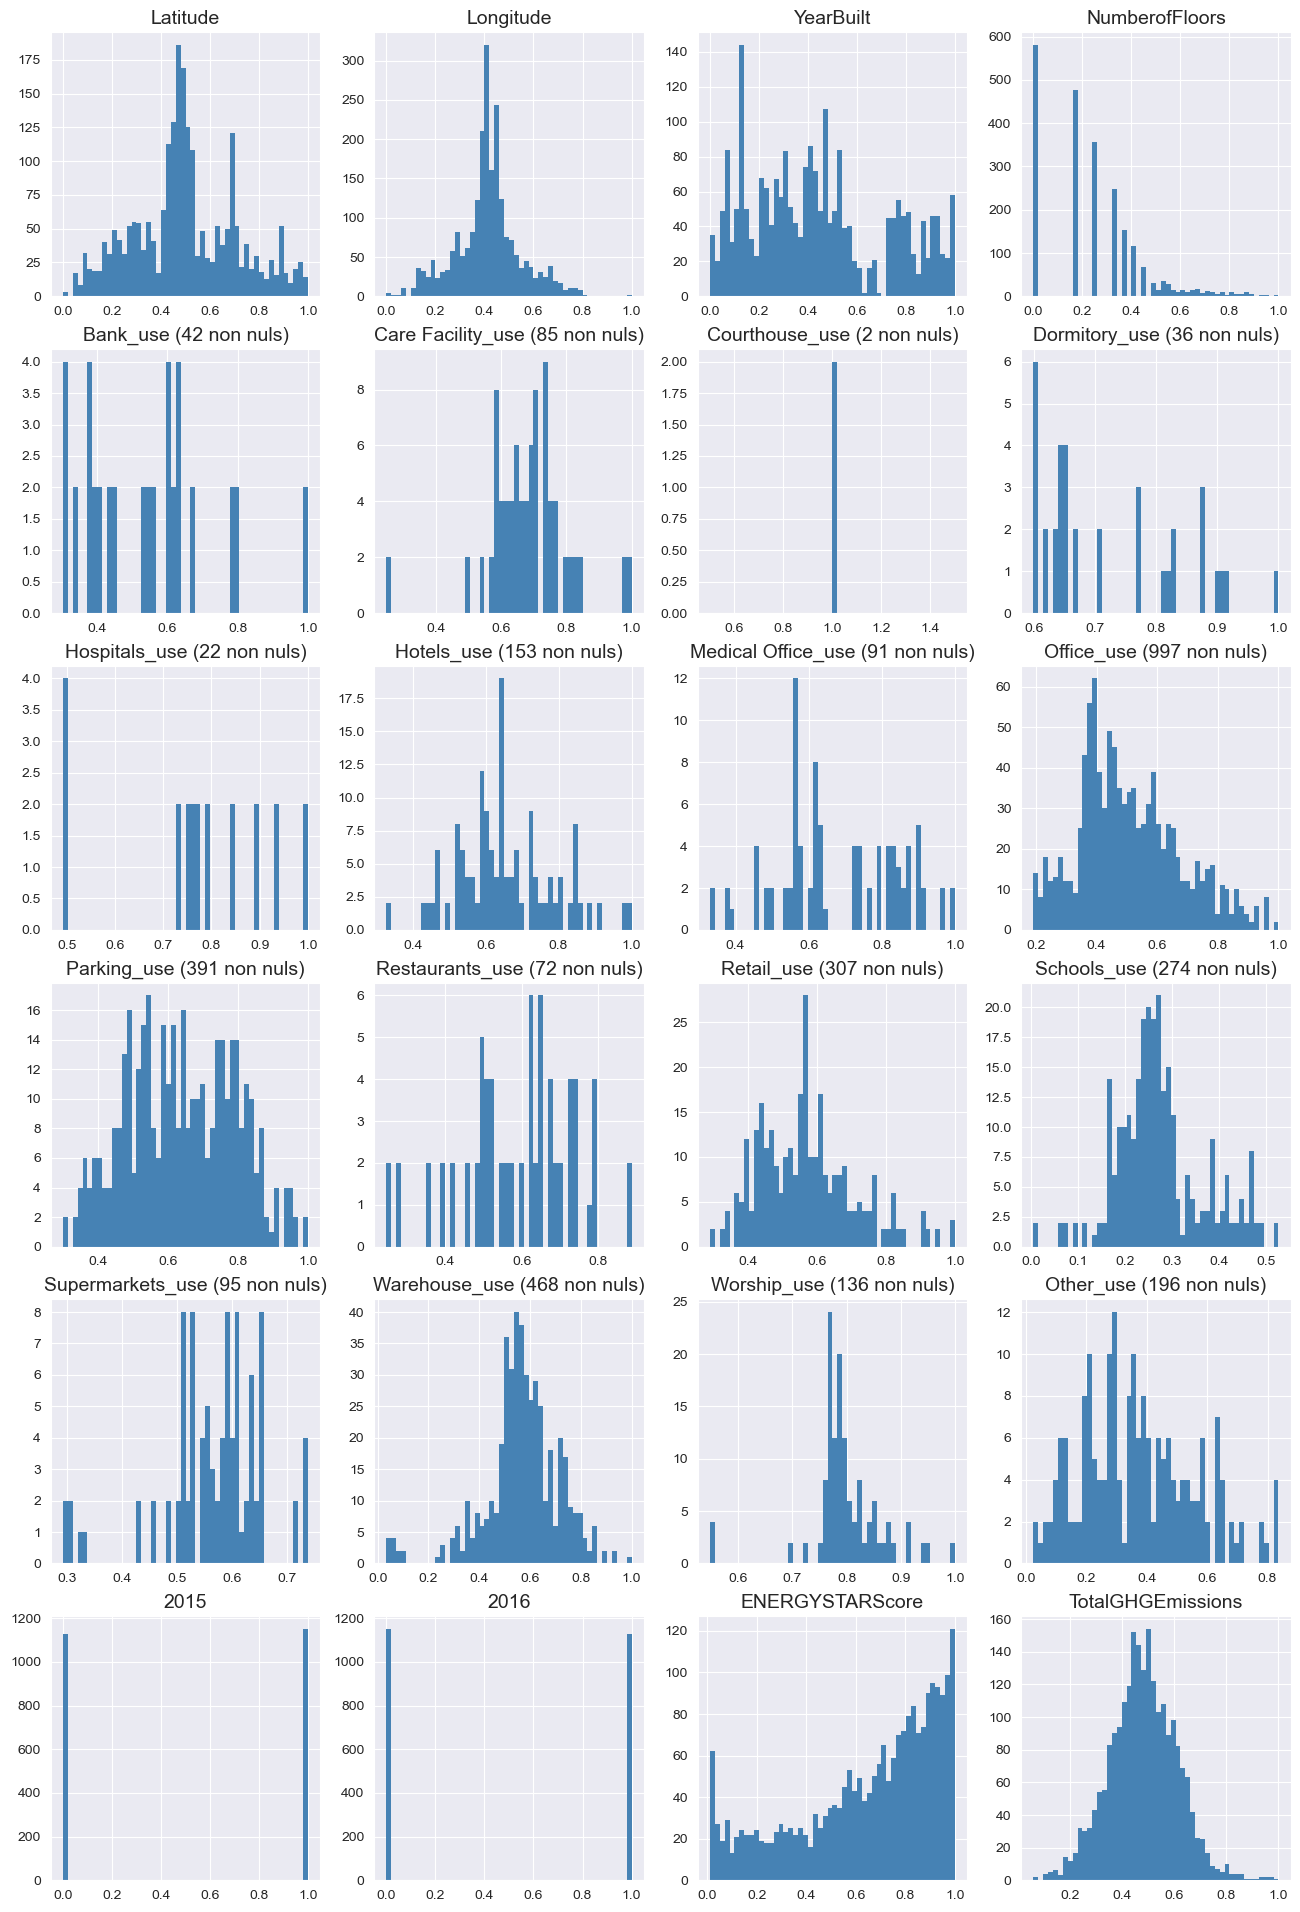

In [4]:
# Données avec utilisation de 'ENERGYSTARScore'
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Jeu de donnée pour la modélisation de 'TotalGHGEmissions' avec utilisation de 'ENERGYSTARScore'\n"
      + Style.RESET_ALL)
Xe = data.dropna()[data.columns[2:-2]].values
fXe_names = data[data.columns[2:-2]].columns
ze = data.dropna()['TotalGHGEmissions'].values
print(Fore.GREEN + "► Dimensions des données Xe :" + Style.RESET_ALL, f"{Xe.shape}\n")

# Représentation graphique des données Xe
fig = plt.figure(figsize=(16, 24))
for feat_idx in range(Xe.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    if (feat_idx<4) or (feat_idx>19):
        h = ax.hist(Xe[:, feat_idx], bins=50, color='steelblue', density=False, edgecolor='none')
        ax.set_title(f"{fXe_names[feat_idx]}", fontsize=14)
    else:
        h = ax.hist(np.delete(Xe[:, feat_idx], np.where(Xe[:, feat_idx]==0)), bins=50, color='steelblue', density=False, edgecolor='none')
        ax.set_title(f"{fXe_names[feat_idx]} ({np.count_nonzero(Xe[:, feat_idx])} non nuls)", fontsize=14)
ax = fig.add_subplot(6,4, 24)
h = ax.hist(ze, bins=50, color='steelblue', density=False, edgecolor='none')
ax.set_title("TotalGHGEmissions", fontsize=14)
print(Fore.GREEN + "► Représentation graphique des données :" + Style.RESET_ALL)
plt.show()

In [5]:
# Import des fonctions de sklearn communes
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

print('Version de scikit-learn : ' + sklearn.__version__)

# Fixe la valeur de random_state
rs = 0

# Découpage en jeux d'entrainement et jeux de test
Xy_train, Xy_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
Xz_train, Xz_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=rs)
Xe_train, Xe_test, ze_train, ze_test = train_test_split(Xe, ze, test_size=0.2, random_state=rs)

# Définition des cibles d'entrainement de modèle et données associées
Xtr_list = [Xy_train, Xz_train, Xe_train]
ytr_list = [y_train, z_train, ze_train]
Xte_list = [Xy_test, Xz_test, Xe_test]
yte_list = [y_test, z_test, ze_test]
f_names = [fX_names, fX_names, fXe_names]
X_list = [X, X, Xe]
y_list = [y, z, ze]

# Définition des cibles d'entrainement, scoring et critères de comparaison
targets = fct.init_target_list(['SiteEnergyUse', 'TotalGHGEmissions sans ENERGYSTARScore', 'TotalGHGEmissions avec ENERGYSTARScore'])
scorings = fct.init_scoring_list(['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_median_absolute_error'])
criterions = fct.init_criterion_list(['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_median_absolute_error', 'fit_time'])
fct.init_result_table()

# Définition des paramètres de recherche du meilleur modèle
CV = 4
Scoring = 'neg_mean_squared_error'
n_jobs = -1

Version de scikit-learn : 1.1.3


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="process"></a>
## 3 - Processus de modélisation
L'énergie consommée et des émissions de GES sont les cibles de la modélisation que nous souhaitons effectuer. Ces cibles étant des grandeurs numériques quantitatives (nous souhaitons prédire leurs quantités en fonction de variables), nous nous orientons vers des modèles de régression.

L'image ci-après indique le cheminement recommandé pour sélectionner le modèle.
Par ailleurs, s'agissant d'un premier projet de machine learning, nous souhaitons examiner la majorité des modèles de régression mentionnés dans cette image, afin de les découvrir plus avant.
C'est pourquoi nous examinerons une liste de modèles sans suivre strictement le séquencement proposé par scikit-learn mais en l'utilisant comme guide pour évoluer dans le sens croissant de la complexité.

Sur la base de cette liste de modèles, nous mettrons en œuvre un processus de recherche et de sélection du meilleur modèle pour la modélisation de chacune des 3 cibles.



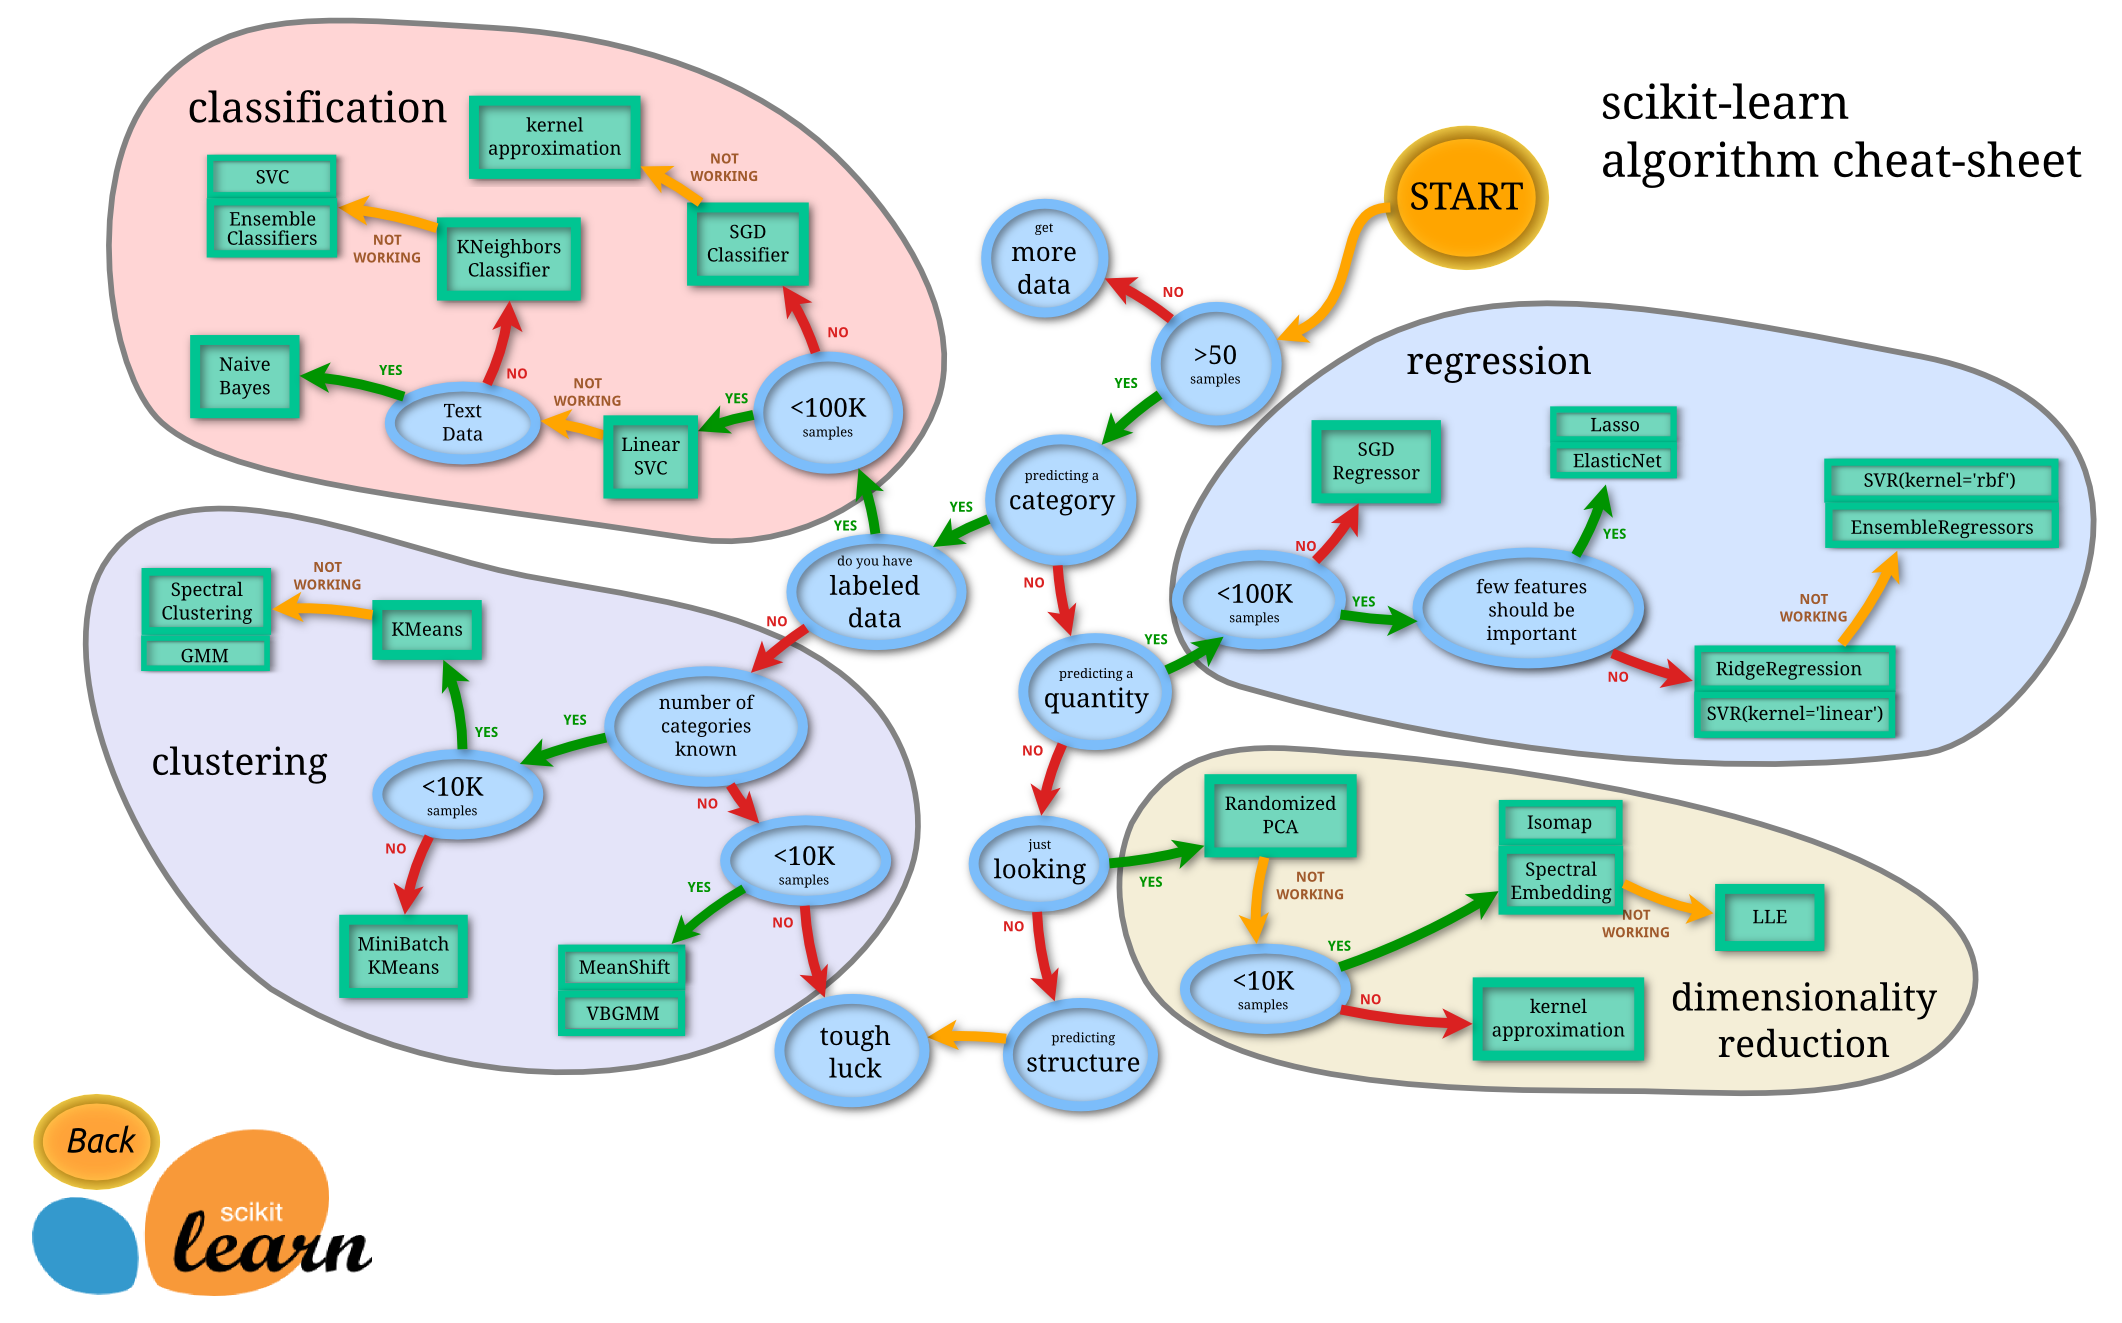

In [6]:
display_png(Image("https://scikit-learn.org/stable/_static/ml_map.png"))

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="model_list"></a>
### 3.1 Liste des modèles testés
Les modèles sont testés en recherchant une progression, du plus basique au plus complexe.

Nous commencerons par établir une référence de base (baseline) avec un modèle simpliste (Dummy).

Nous poursuivrons par des modèles de régression linéaires (Ridge, Lasso et ElasticNet), puis des modèles non linéaires (SVR, kRR et MLP), et terminerons enfin avec des modèles ensemblistes (random forest, AdaBoost et XGBoost).

Au total, nous allons tester 10 modèles sur 4 familles.

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="eval_process"></a>
### 3.2 Recherche et évaluation du meilleur modèle
L'évaluation sera effectuée en utilisant le même processus et les mêmes métriques afin de comparer les modèles de manière robuste.

Les métriques utilisées sont :
 - le score 'MSE' pour l'optimisation des modèles (les autres métriques peuvent également être utilisées le cas échéant) ;
 - les scores 'r2', 'MAE' et 'Median Absolute Error' pour apporter des métriques complémentaires dans la comparaison des modèles ;
 - le temps d'apprentissage du modèle.

La recherche du meilleur modèle s'effectuera sur grille (GridSearchCV) en faisant varier les hyper-paramètres spécifiques à chaque modèle.
Afin d'assurer une comparaison des modèles sur des découpes équivalentes du jeu de données, nous fixons le paramètre random_state=0.

La recherche du meilleur modèle pour chaque type de modèle s'effectue avec la fonction 'search_best_model' (Pelec_04_fonctions.py) et retourne:
- le meilleur modèle ;
- les meilleurs hyper-paramètres ;
- le score correspondant à la métrique fixée pour l'optimisation (variable Scoring = MSE) ;
- le temps de recherche.

La visualisation de l'influence des hyper-paramètres sur le score s'effectue avec la fonction 'plt_grid' (Pelec_04_fonctions.py) qui utilise les informations de la grille (cv_results) pour tracer les scores de test (et en option ceux d'entrainement) en fonction des plages d'hyper-paramètres fixés (param_grid), en se fixant la limite de 3 paramètres variant simultanément.
Cela permet d'ajuster de manière itérative les hyper-paramètres.
Ce Notebook présente la dernière itération réalisée, donc sur les paramètres réglés en dernier, en utilisant des plages de variations aussi explicites que possible (au détriment du temps de calcul) afin de visualiser la pertinence de sélection des paramètres.

Afin de mesurer l'importance des features (variables d'entrées du jeu de données), les fonctions 'plot_estimator_coef' et 'plot_feature_importance' (Pelec_04_fonctions.py) donnent leurs poids associés.

Enfin, la fonction 'learning_graph' (Pelec_04_fonctions.py) donne la courbe d'apprentissage du modèle en fonction de taille de l'échantillon d'entrainement. Cela nous permettra d'estimer le biais et la variance du modèle ainsi que son potentiel d'amélioration avec l'apport de nouvelles données.

Une fois faites ces opérations de mise au point du meilleur modèle, la fonction d'évaluation 'eval_model' (Pelec_04_fonctions.py) évalue le modèle selon les métriques définies ci-dessus et enregistre le résultat dans un tableau de comparaison en vue du bilan.

Au final, nous ferons le bilan de l'ensemble des modèles testés afin de mettre en évidence le plus performant et évaluer l’intérêt de l’“ENERGY STAR Score” pour la prédiction d’émissions. Pour chacune des 3 cibles, le résultat est présenté sous la forme d'un tableau comparatif des métriques et affichage du graphe correspondant.
Ce bilan est enregistré dans un fichier cvs (séparateur ';') contenant le nom de chaque modèle, les valeurs des métriques ainsi que les paramètres du modèle.

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="random"></a>
## 4 - Modèles de baseline
Nous examinons ici des modèles simplistes afin de constituer une baseline (référence au plus bas) pour l'évaluation des modèles de régression.
Avec un score obtenu négatif ou nul, la barre est fixée au plus bas!

<a id="random"></a>
### 4.1 Modèle aléatoire
Ce modèle s'appuie sur la fonction aléatoire np.random.uniform.
Son score est négatif (la variance des erreurs quadratiques est supérieure à celle des cibles). Nous ne le retiendrons pas comme baseline.

In [7]:
from random import uniform
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Modèle baseline : Random\n" + Style.RESET_ALL)
# SiteEnergyUse
print(Fore.GREEN + "► Modélisation de" + Style.RESET_ALL, "SiteEnergyUse")
start_time = timeit.default_timer()
y_pred_random = np.random.uniform(np.min(y), np.max(y), y_test.shape)
elapsed = timeit.default_timer() - start_time
print(Fore.GREEN + f"  → Score R2 = {metrics.r2_score(y_test, y_pred_random):.2f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → MSE = {metrics.mean_squared_error(y_test, y_pred_random):.4f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → Durée de calcul = {elapsed:.3f}s\n" + Style.RESET_ALL)

# TotalGHGEmissions sans ENERGYSTARScore
print(Fore.GREEN + "► Modélisation de" + Style.RESET_ALL, "TotalGHGEmissions sans ENERGYSTARScore")
start_time = timeit.default_timer()
z_pred_random = np.random.uniform(np.min(z), np.max(z), z_test.shape)
elapsed = timeit.default_timer() - start_time
print(Fore.GREEN + f"  → Score R2 = {metrics.r2_score(z_test, z_pred_random):.2f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → MSE = {metrics.mean_squared_error(z_test, z_pred_random):.4f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → Durée de calcul = {elapsed:.3f}s\n" + Style.RESET_ALL)

# TotalGHGEmissions avec ENERGYSTARScore
print(Fore.GREEN + "► Modélisation de" + Style.RESET_ALL, "TotalGHGEmissions avec ENERGYSTARScore")
start_time = timeit.default_timer()
ze_pred_random = np.random.uniform(np.min(ze), np.max(ze), ze_test.shape)
elapsed = timeit.default_timer() - start_time
print(Fore.GREEN + f"  → Score R2 = {metrics.r2_score(ze_test, ze_pred_random):.2f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → MSE = {metrics.mean_squared_error(ze_test, ze_pred_random):.4f}" + Style.RESET_ALL)
print(Fore.GREEN + f"  → Durée de calcul = {elapsed:.3f}s\n" + Style.RESET_ALL)

Modèle baseline : Random

► Modélisation de SiteEnergyUse
  → Score R2 = -5.68
  → MSE = 0.0940
  → Durée de calcul = 0.001s

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Score R2 = -4.19
  → MSE = 0.1018
  → Durée de calcul = 0.000s

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Score R2 = -5.01
  → MSE = 0.0994
  → Durée de calcul = 0.000s



<a id="dummyreg"></a>
### 4.2 Modèle DummyRegressor
Nous utilisons notre fonction eval_model pour évaluer ce modèle.
La performance en termes de score 'r2' est proche de 0 par valeurs négatives, montrant une légère amélioration par rapport au modèle aléatoire.
Ce modèle constituera notre baseline.

In [8]:
from sklearn.dummy import DummyRegressor
model, model_name = fct.append_model(DummyRegressor())

# Définition des grilles de recherche
param_grid = {}
param_grid[targets[0]] = {'strategy': ('mean', 'median', 'quantile', 'constant'),
                          'constant': np.arange(0, 1, 0.1),
                          'quantile': np.arange(0, 1, 0.1)}
param_grid[targets[1]] = {'strategy': ('mean', 'median', 'quantile', 'constant'),
                          'constant': np.arange(0, 1, 0.1),
                          'quantile': np.arange(0, 1, 0.1)}
param_grid[targets[2]] = {'strategy': ('mean', 'median', 'quantile', 'constant'),
                          'constant': np.arange(0, 1, 0.1),
                          'quantile': np.arange(0, 1, 0.1)}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    #fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='quantile', scale='linear')
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    #fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)



 Modèle : DummyRegressor - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = DummyRegressor(constant=0.0, quantile=0.0)
  → Meilleurs paramètres = {'constant': 0.0, 'quantile': 0.0, 'strategy': 'mean'}
  → Meilleur score d'entrainement  = -0.0136
  → Temps de recherche = 0:00:01.416040
  →  Evaluation sur l'échantillon de test :




 Modèle : DummyRegressor - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = DummyRegressor(constant=0.0, quantile=0.0)
  → Meilleurs paramètres = {'constant': 0.0, 'quantile': 0.0, 'strategy': 'mean'}
  → Meilleur score d'entrainement  = -0.0181
  → Temps de recherche = 0:00:00.883136
  →  Evaluation sur l'échantillon de test :




 Modèle : DummyRegressor - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = DummyRegressor(constant=0.0, quantile=0.0)
  → Meilleurs paramètres = {'constant': 0.0, 'quantile': 0.0, 'strategy': 'mean'}
  → Meilleur score d'entrainement  = -0.0172
  → Temps de recherche = 0:00:00.796059
  →  Evaluation sur l'échantillon de test :


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

## 5 - Modèles linéaires continus
Globalement, les 3 modèles Ridge, Lasso et ElasticNet donnent des résultats très proches les uns des autres, avec une performance plutôt moyenne.

<a id="ridge"></a>
### 5.1 Ridge
Ce modèle est entrainé en faisant varier les 3 hyper-paramètres 'alpha', 'fit_intercept' et 'solver' :
  - Plusieurs solveurs donnent les meilleurs résultats, en particulier 'sag' et 'saga'.
  - L'hyper-paramètre 'fit_intercept' n'a pas d'influence significative pour ces solveurs.
  - Le terme de régularisation 'alpha' est de l'ordre de 1e-2 ou 1e-1 selon la cible.

La plupart des features ont une importance significative dans ce modèle, à l'exception de celles concernant :
- la localisation du site (coordonnées GPS) ;
- l'année de mesure (2015 ou 2016), sauf pour la prédiction des émissions de GES utilisant l'EnergyStarScore, signifiant probablement que l'année de mesure aurait une influence indirecte sur les émissions de GES, via l'EnergyStarScore.

En outre, l'utilisation de l'EnergyStarScore a un impact significatif sur le score de modélisation Ridge des émissions de GES.

Enfin, les courbes d'apprentissage montrent que la modélisation ridge est peu adaptée à nos cibles.




 Modèle : Ridge - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = Ridge(alpha=0.12648552168552957, random_state=0, solver='saga')
  → Meilleurs paramètres = {'alpha': 0.12648552168552957, 'fit_intercept': True, 'solver': 'saga'}
  → Meilleur score d'entrainement  = -0.0061
  → Temps de recherche = 0:00:10.942191
  → Scores en fonction des paramètres de la grille :


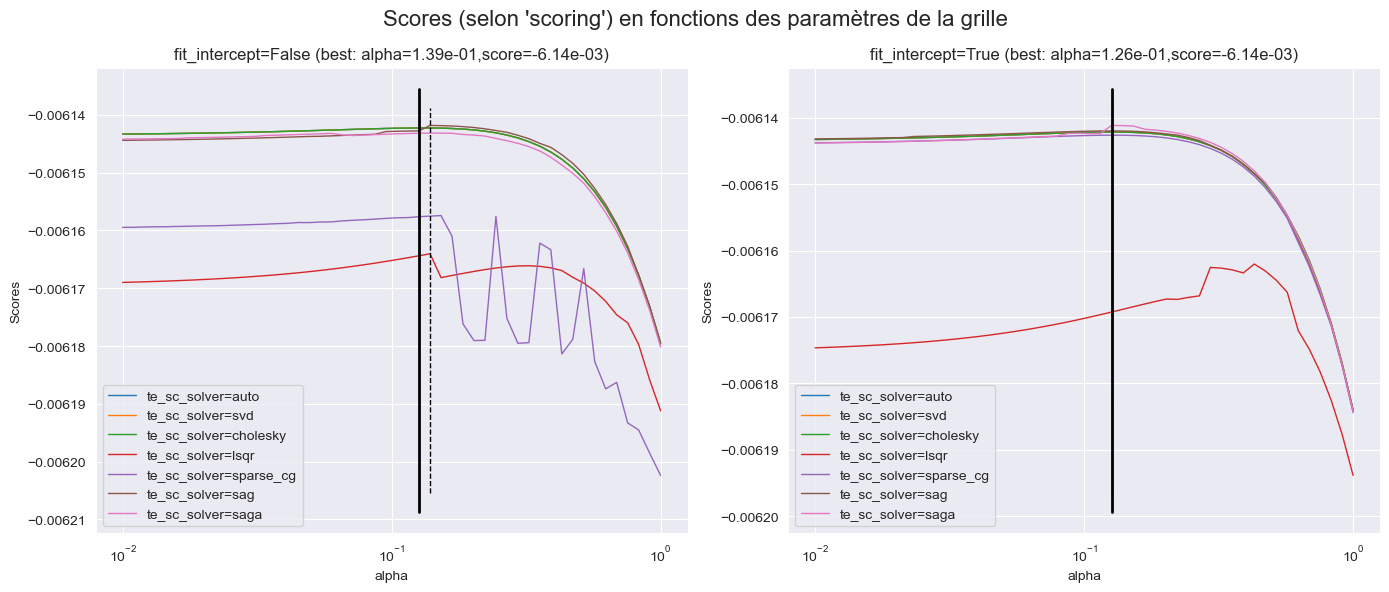

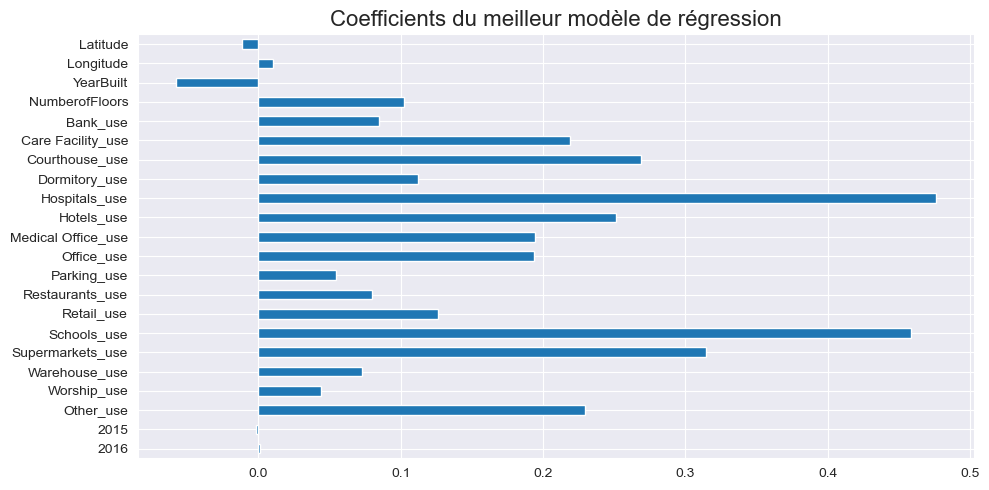

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


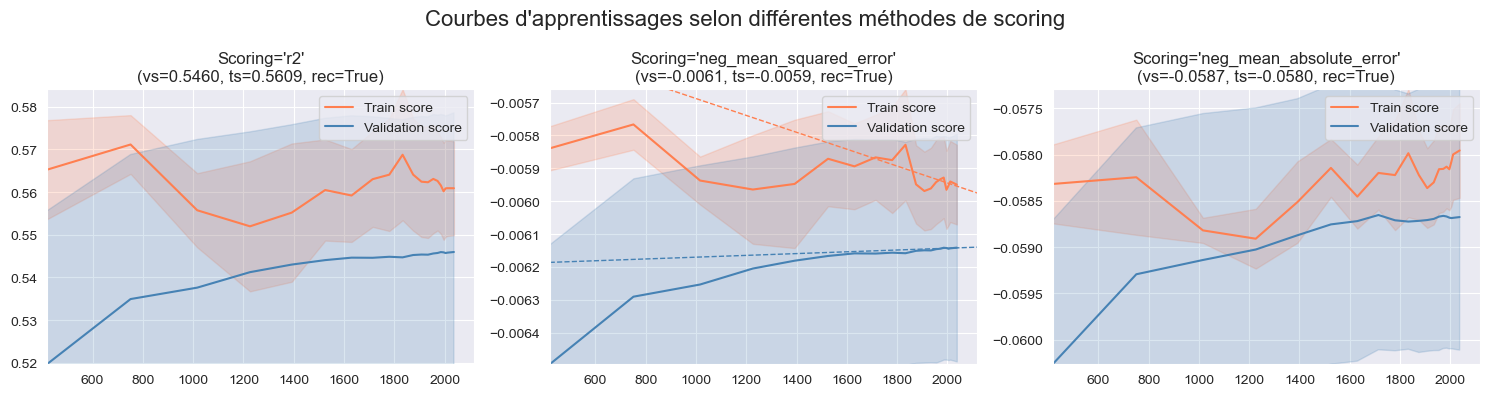



 Modèle : Ridge - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = Ridge(alpha=0.021209508879201904, random_state=0, solver='sag')
  → Meilleurs paramètres = {'alpha': 0.021209508879201904, 'fit_intercept': True, 'solver': 'sag'}
  → Meilleur score d'entrainement  = -0.0108
  → Temps de recherche = 0:00:09.718828
  → Scores en fonction des paramètres de la grille :


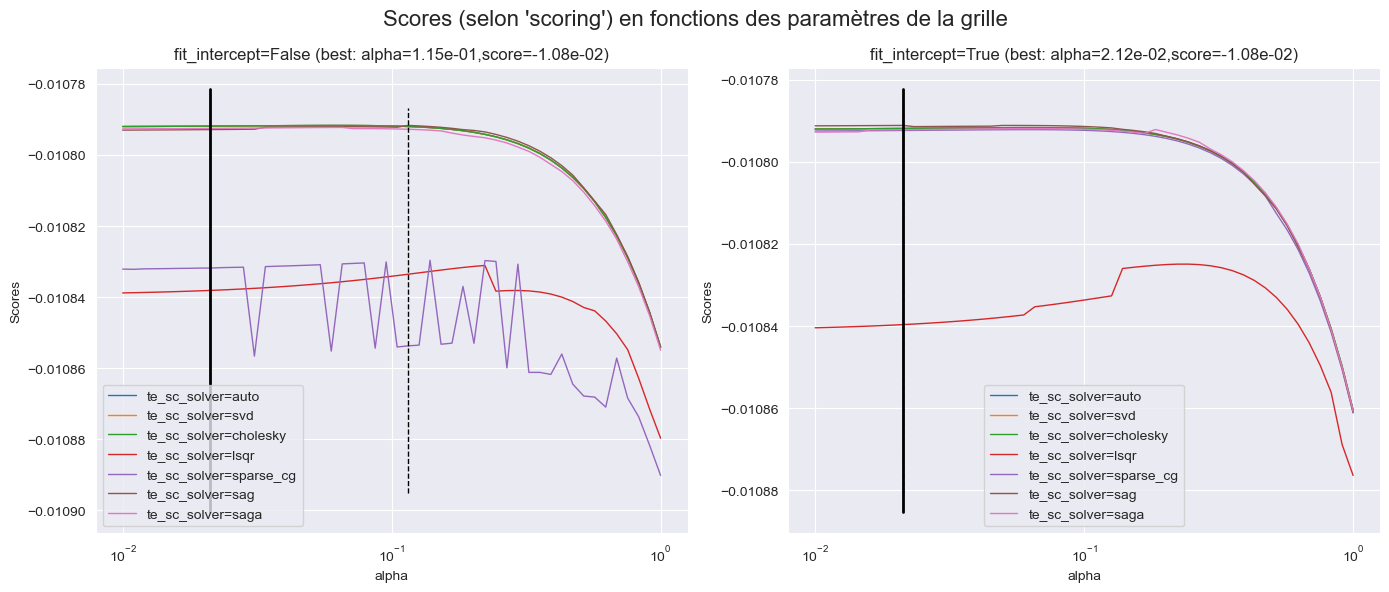

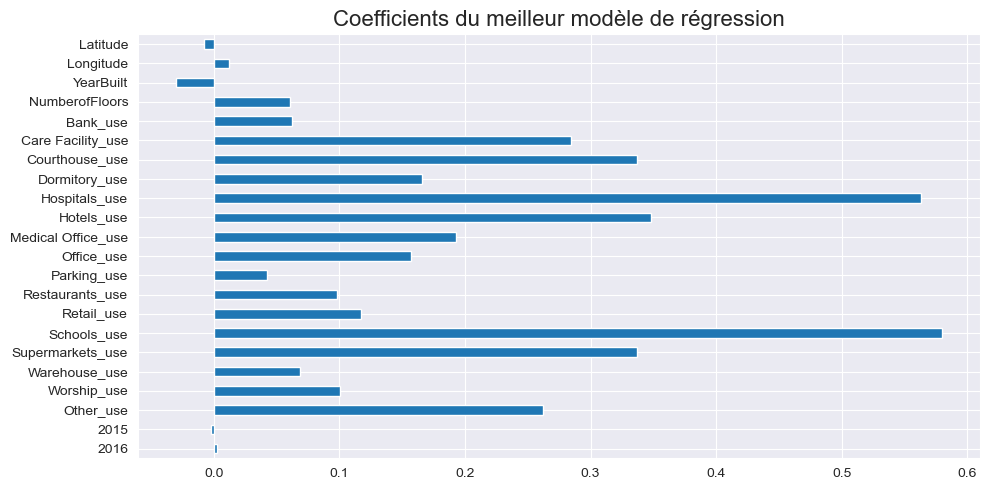

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


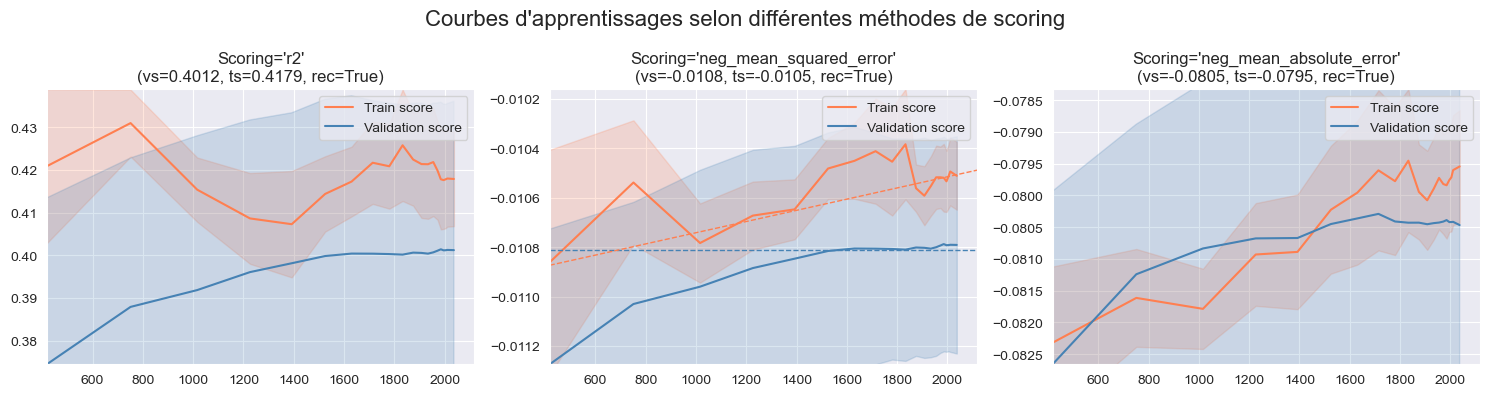



 Modèle : Ridge - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = Ridge(alpha=0.09540954763499938, random_state=0, solver='sag')
  → Meilleurs paramètres = {'alpha': 0.09540954763499938, 'fit_intercept': True, 'solver': 'sag'}
  → Meilleur score d'entrainement  = -0.0076
  → Temps de recherche = 0:00:07.497732
  → Scores en fonction des paramètres de la grille :


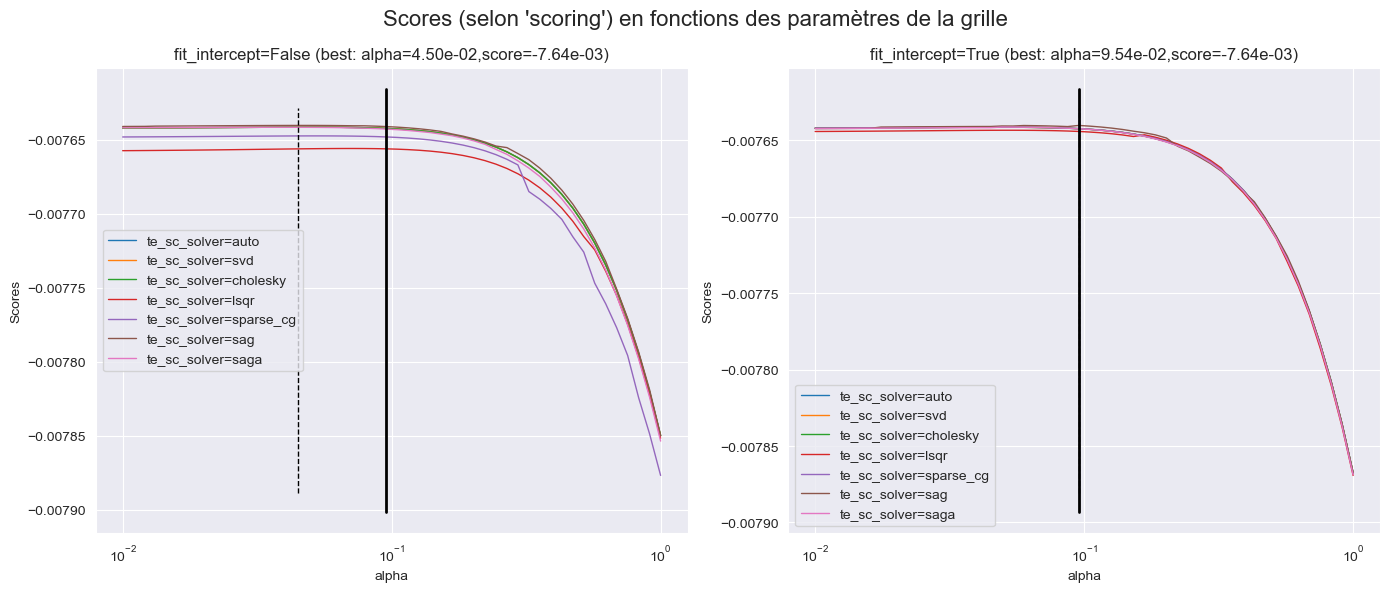

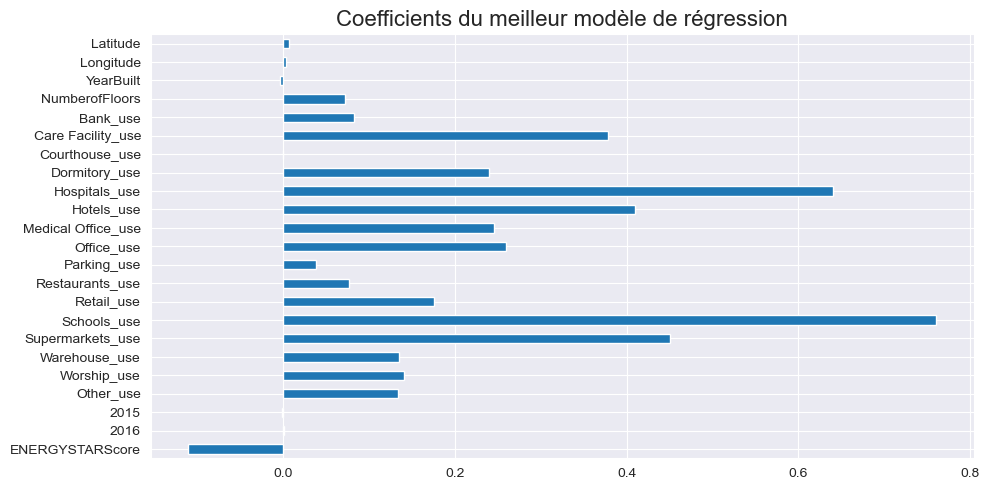

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


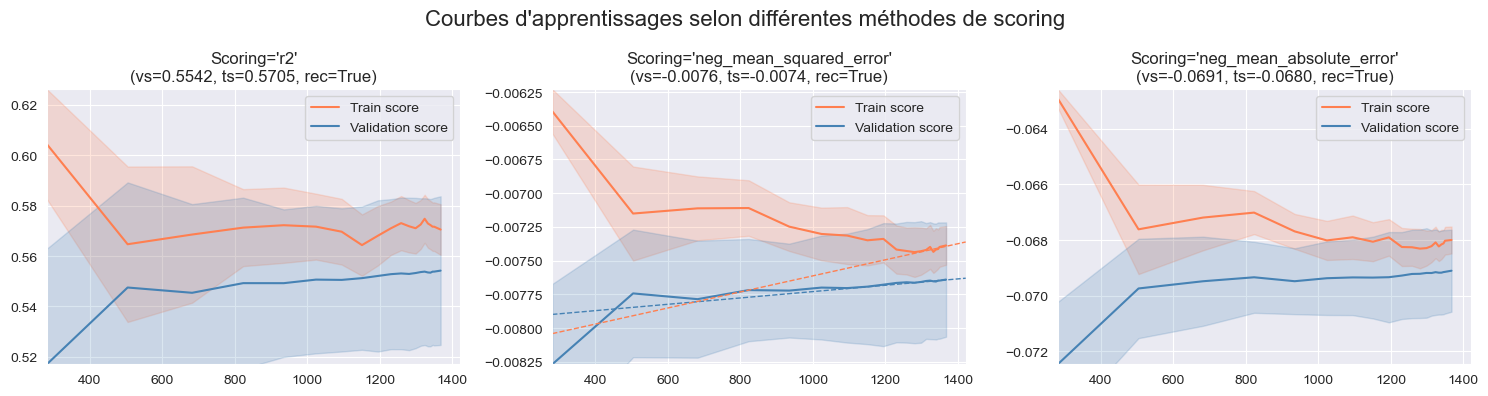

In [9]:
from sklearn.linear_model import Ridge
model, model_name = fct.append_model(Ridge(random_state=rs))

# Définition des grilles de recherche
n_alphas = 50
alphas = np.logspace(-2, 0, n_alphas)
fit_intercepts = [False, True]
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

param_grid = {}
param_grid[targets[0]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'solver': solvers}
param_grid[targets[1]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'solver': solvers}
param_grid[targets[2]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'solver': solvers}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='alpha', scale='log')
    fct.plot_estimator_coef(gr[idx].best_estimator_, f_names[idx])
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="lasso"></a>
### 5.2 Lasso
Ce modèle est entrainé en faisant varier les 3 hyper-paramètres 'alpha', 'fit_intercept' et 'selection' :
  - Les hyper-paramètres 'fit_intercept' et 'selection' n'ont que peu ou pas d'influence sur le meilleur modèle.
  - Le meilleur terme de régularisation 'alpha' est proche de 0 (régression ordinaire) pour la modélisation de l'énergie et des émissions sans EnergyStarScore, et de l'ordre de 1e-5 pour la modélisation des émissions avec EnergyStarScore.

Les features peu ou pas importantes sont les mêmes que pour la modélisation ridge, et l'amplitude des coefficients des autres est moindre.

En outre, l'EnergyStarScore a une influence limitée sur le résultat de ce modèle.

Enfin, les courbes d'apprentissage montrent que la modélisation lasso est peu adaptée à nos cibles.

Globalement, les scores de la modélisation lasso sont très proches de ceux de la régression Ridge.



 Modèle : Lasso - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = Lasso(alpha=1e-07, max_iter=100000, random_state=0, selection='random')
  → Meilleurs paramètres = {'alpha': 1e-07, 'fit_intercept': True, 'selection': 'random'}
  → Meilleur score d'entrainement  = -0.0061
  → Temps de recherche = 0:00:05.889299
  → Scores en fonction des paramètres de la grille :


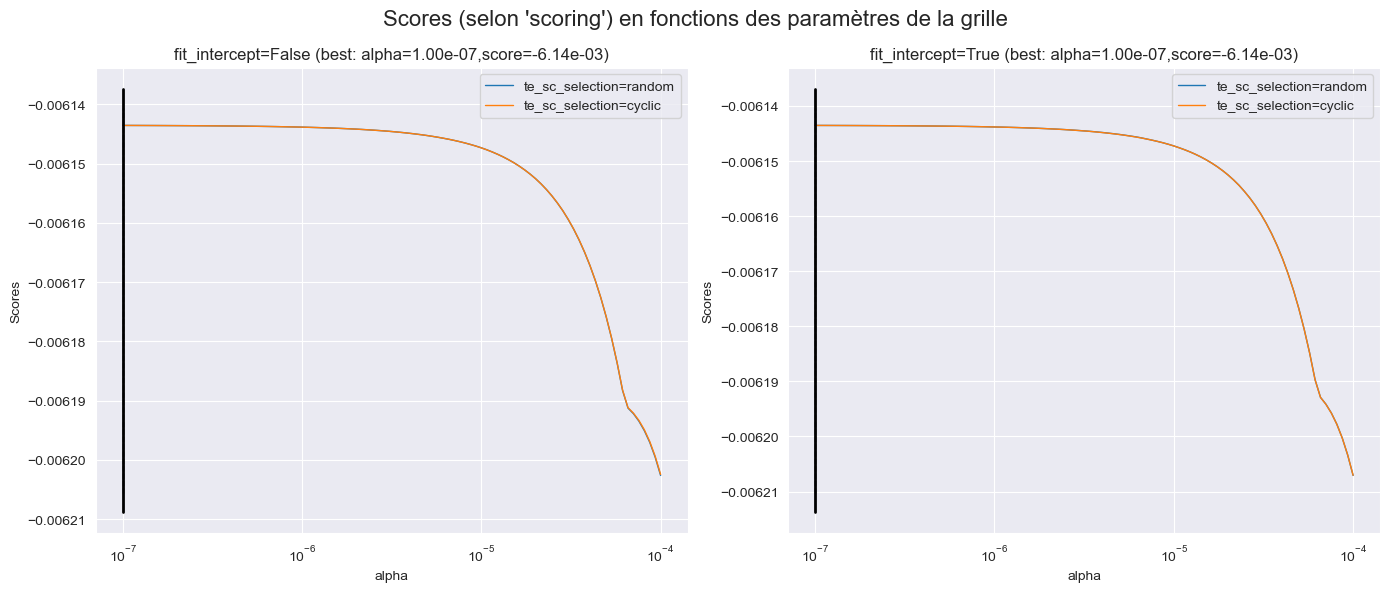

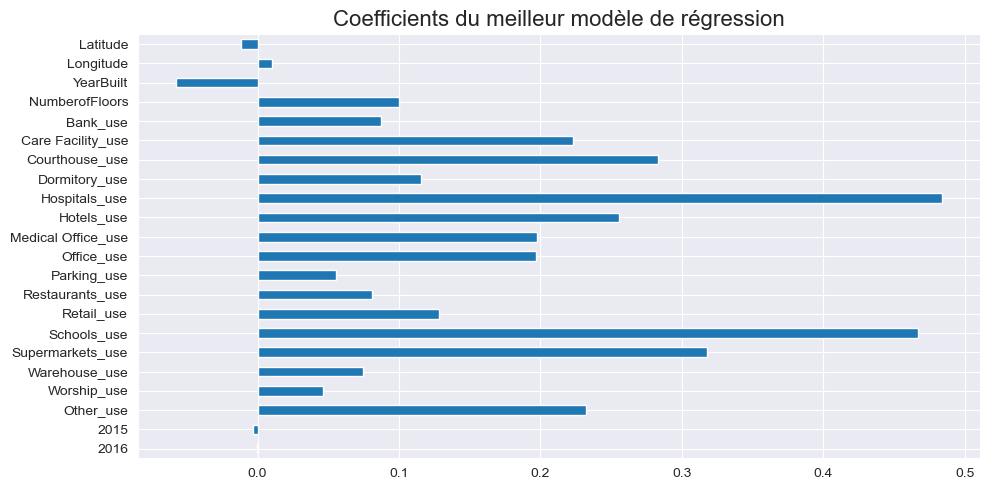

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


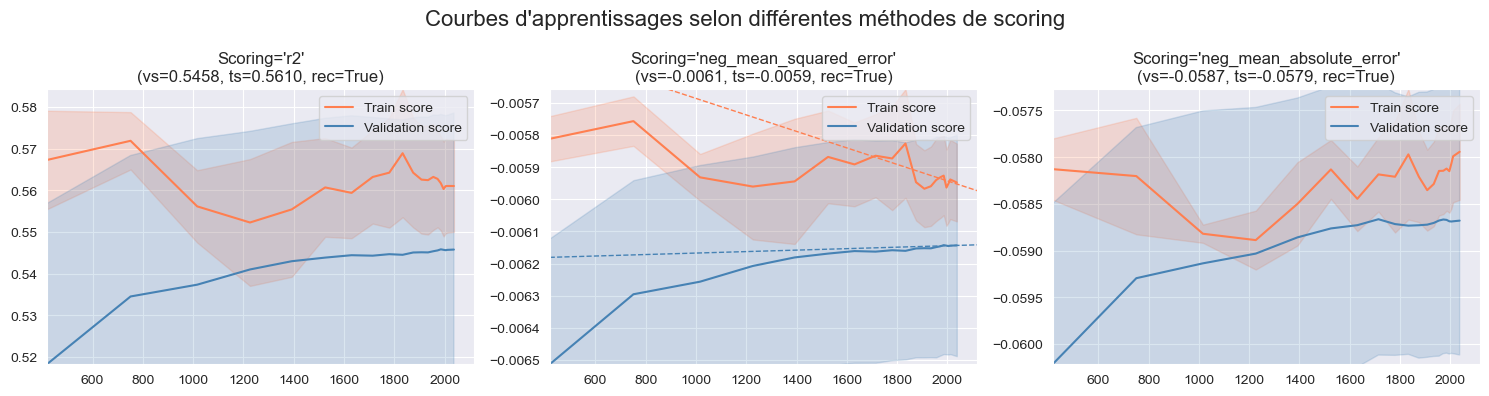



 Modèle : Lasso - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = Lasso(alpha=1e-07, max_iter=100000, random_state=0)
  → Meilleurs paramètres = {'alpha': 1e-07, 'fit_intercept': True, 'selection': 'cyclic'}
  → Meilleur score d'entrainement  = -0.0108
  → Temps de recherche = 0:00:05.798017
  → Scores en fonction des paramètres de la grille :


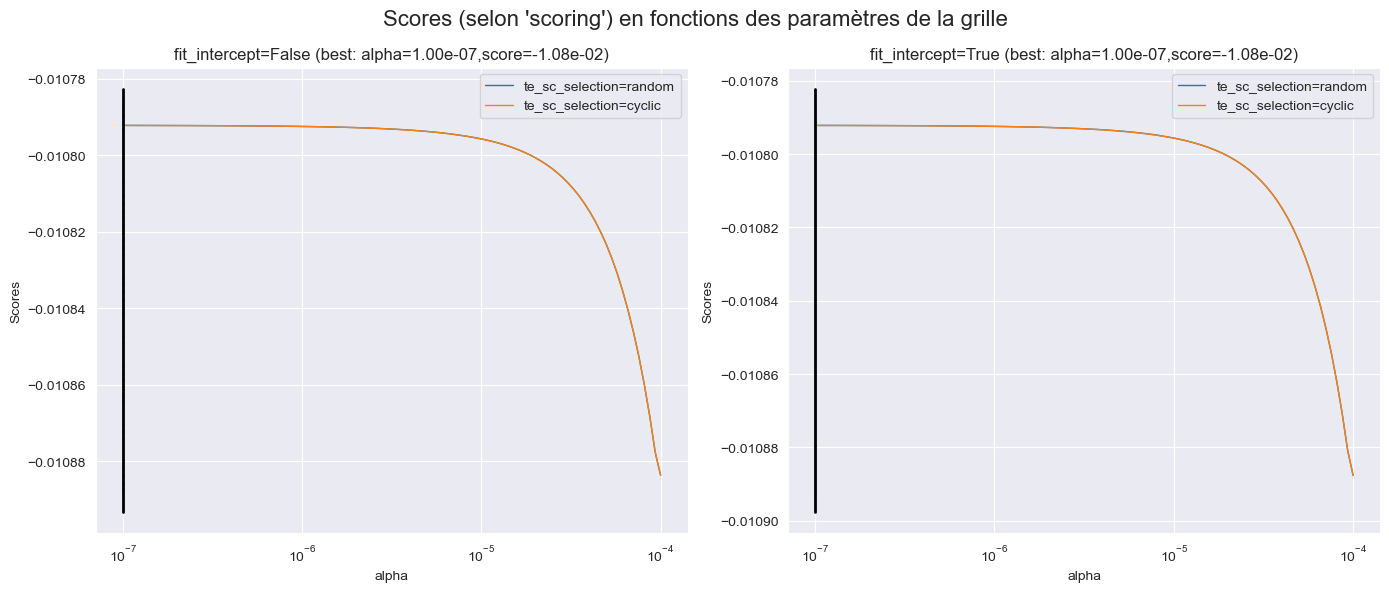

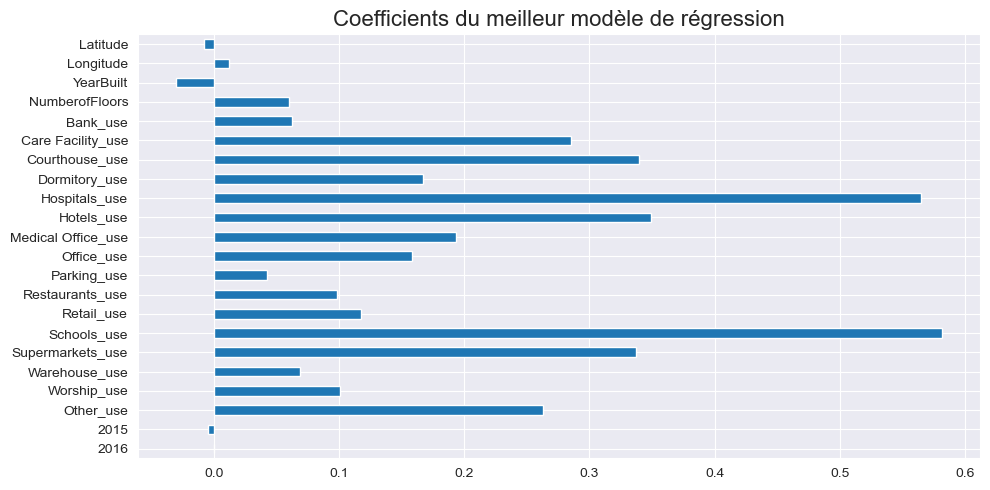

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


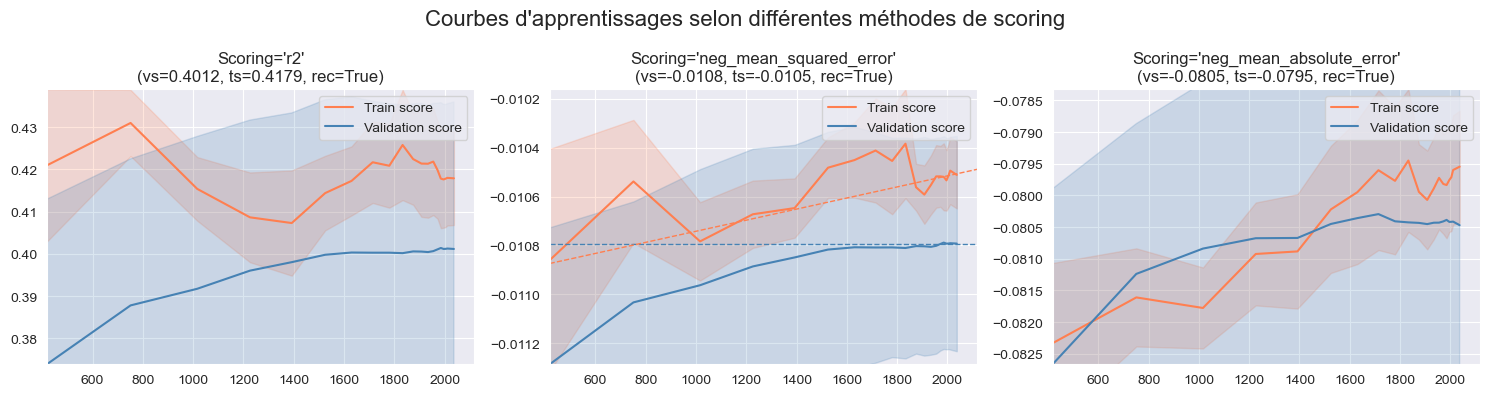



 Modèle : Lasso - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = Lasso(alpha=2.0092330025650458e-05, max_iter=100000, random_state=0,
      selection='random')
  → Meilleurs paramètres = {'alpha': 2.0092330025650458e-05, 'fit_intercept': True, 'selection': 'random'}
  → Meilleur score d'entrainement  = -0.0076
  → Temps de recherche = 0:00:04.379907
  → Scores en fonction des paramètres de la grille :


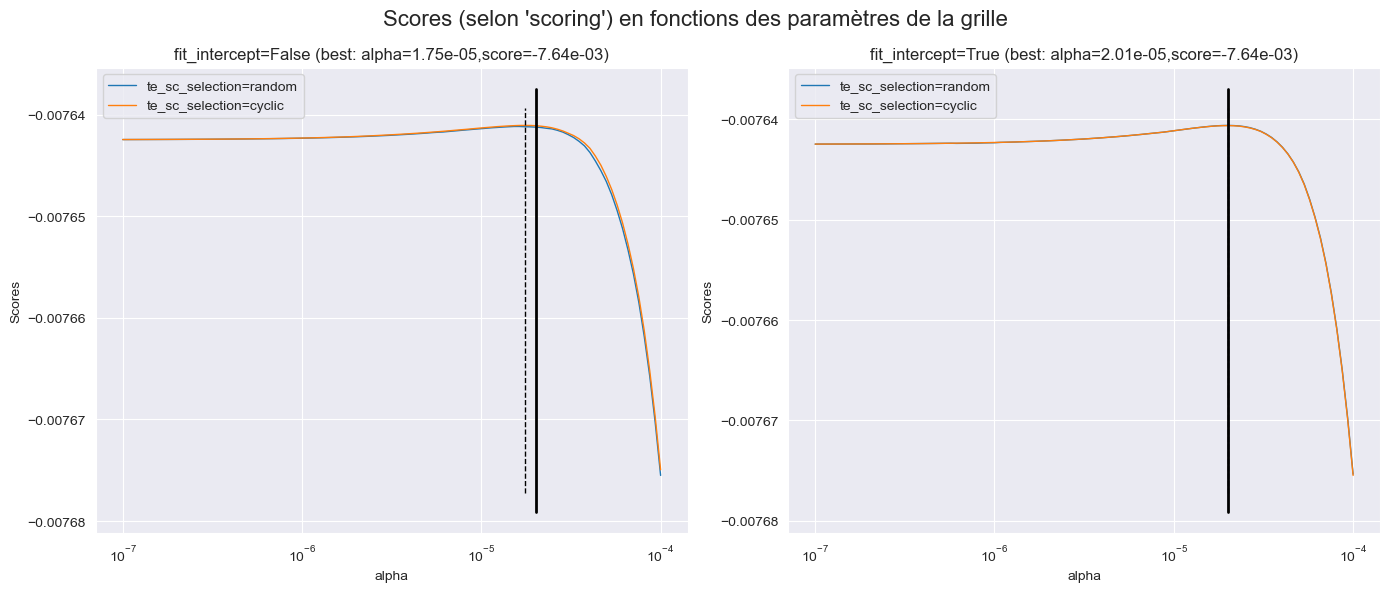

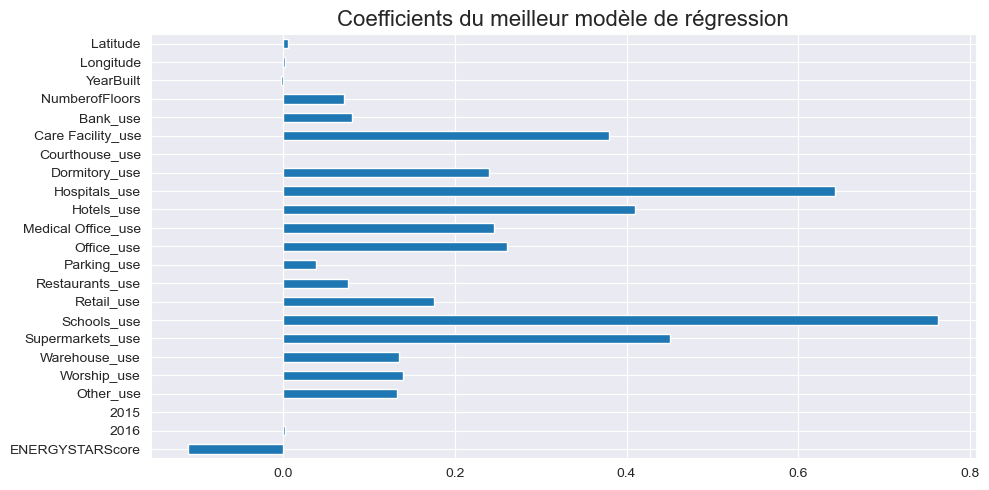

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


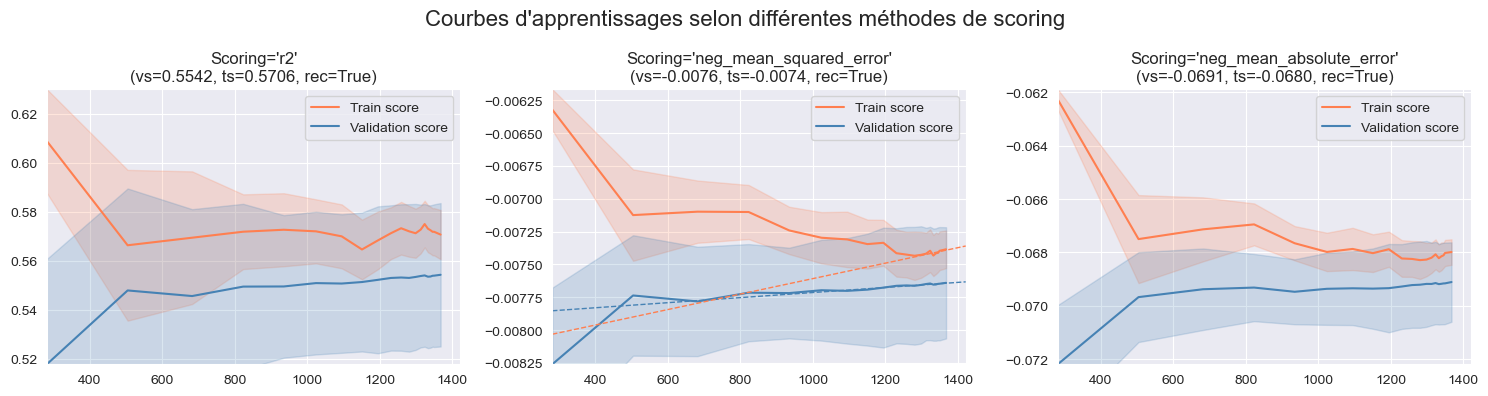

In [10]:
from sklearn.linear_model import Lasso
model, model_name = fct.append_model(Lasso(random_state=rs, max_iter=100000))

# Définition des grilles de recherche
n_alphas = 100
alphas = np.logspace(-7, -4, n_alphas)
fit_intercepts = [False, True]
selections = ['random', 'cyclic']

param_grid = {}
param_grid[targets[0]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'selection': selections}
param_grid[targets[1]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'selection': selections}
param_grid[targets[2]] = {'alpha': alphas,
                          'fit_intercept': fit_intercepts,
                          'selection': selections}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='alpha', scale='log')
    fct.plot_estimator_coef(gr[idx].best_estimator_, f_names[idx])
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="elasnet"></a>
### 5.3 Elastic net
Le modèle Elastic Net donne des résultats très proches de Ridge et Lasso. En effet, les courbes montrent clairement que la proportion de régularisation l1 par rapport à l2 n'a pas d'influence sur le meilleur score.



 Modèle : ElasticNet - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = ElasticNet(alpha=7.742636826811277e-06, l1_ratio=0.1, max_iter=100000,
           random_state=0, selection='random')
  → Meilleurs paramètres = {'alpha': 7.742636826811277e-06, 'l1_ratio': 0.1, 'selection': 'random'}
  → Meilleur score d'entrainement  = -0.0061
  → Temps de recherche = 0:00:08.824447
  → Scores en fonction des paramètres de la grille :


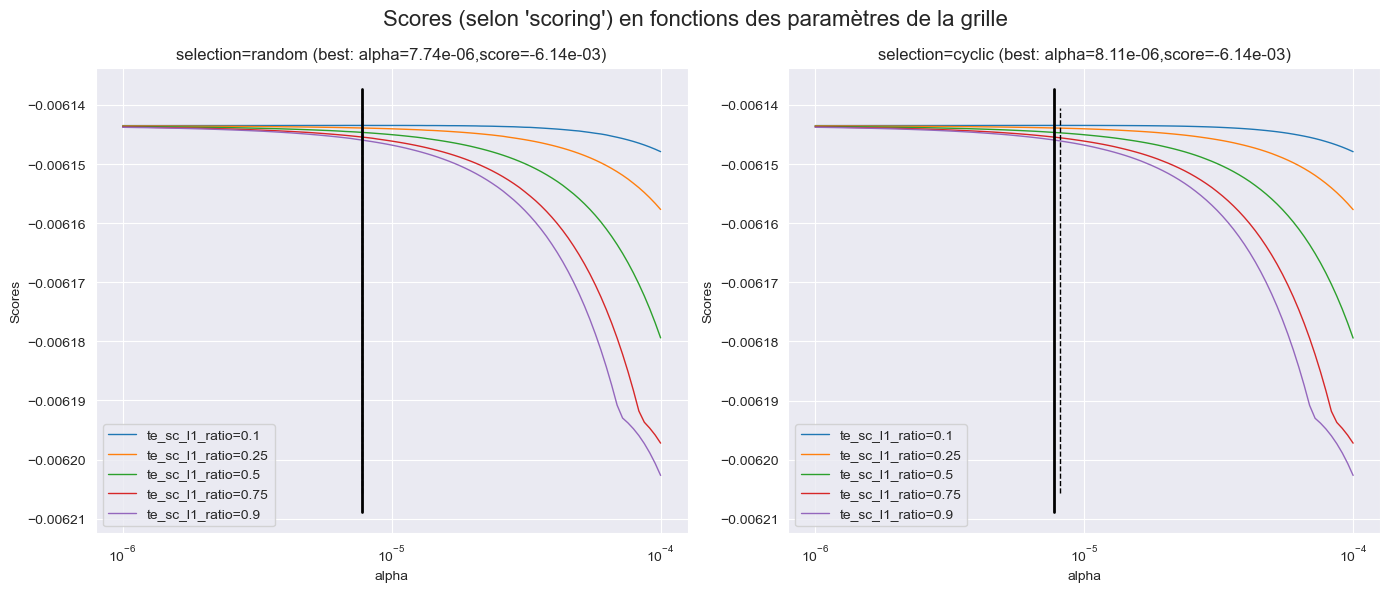

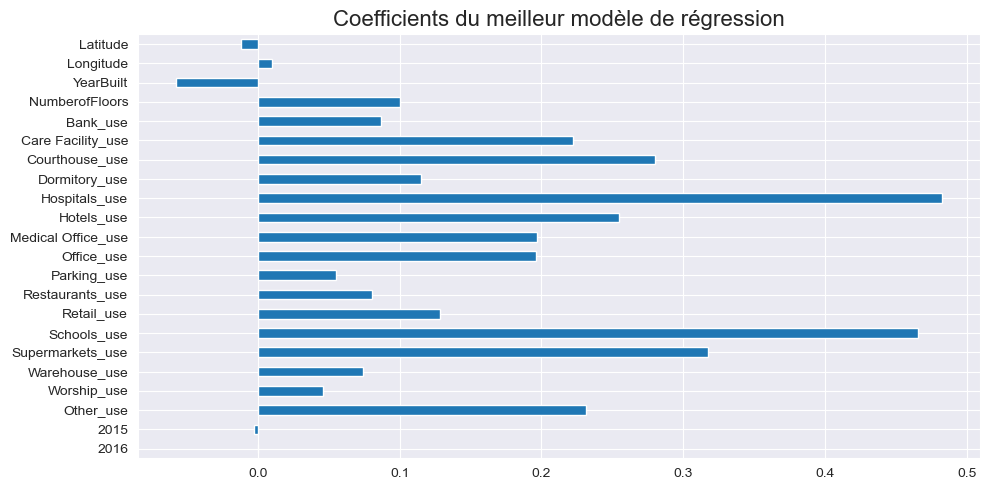

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


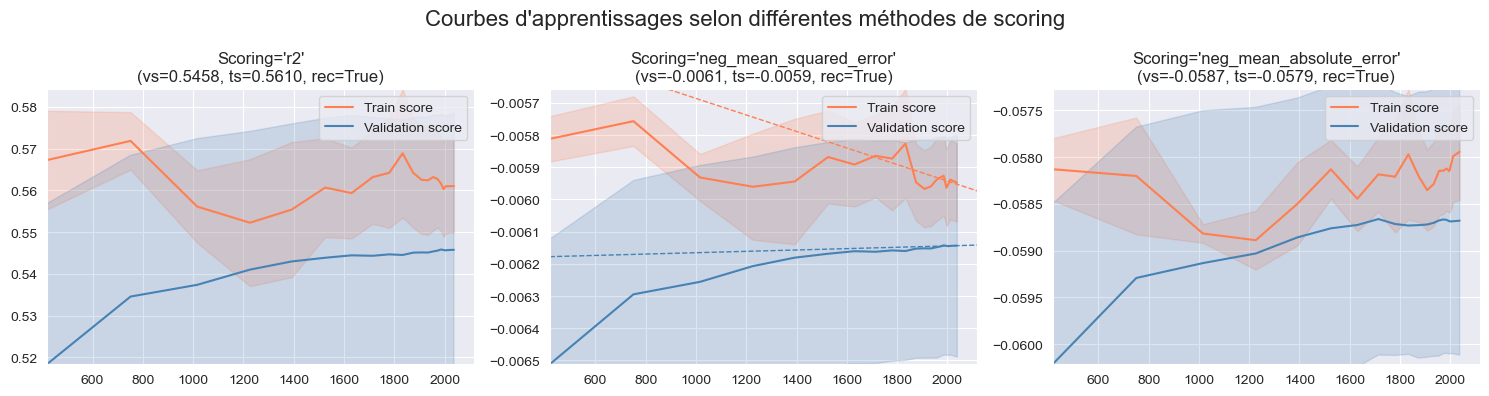



 Modèle : ElasticNet - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = ElasticNet(alpha=1e-06, l1_ratio=0.1, max_iter=100000, random_state=0)
  → Meilleurs paramètres = {'alpha': 1e-06, 'l1_ratio': 0.1, 'selection': 'cyclic'}
  → Meilleur score d'entrainement  = -0.0108
  → Temps de recherche = 0:00:09.803398
  → Scores en fonction des paramètres de la grille :


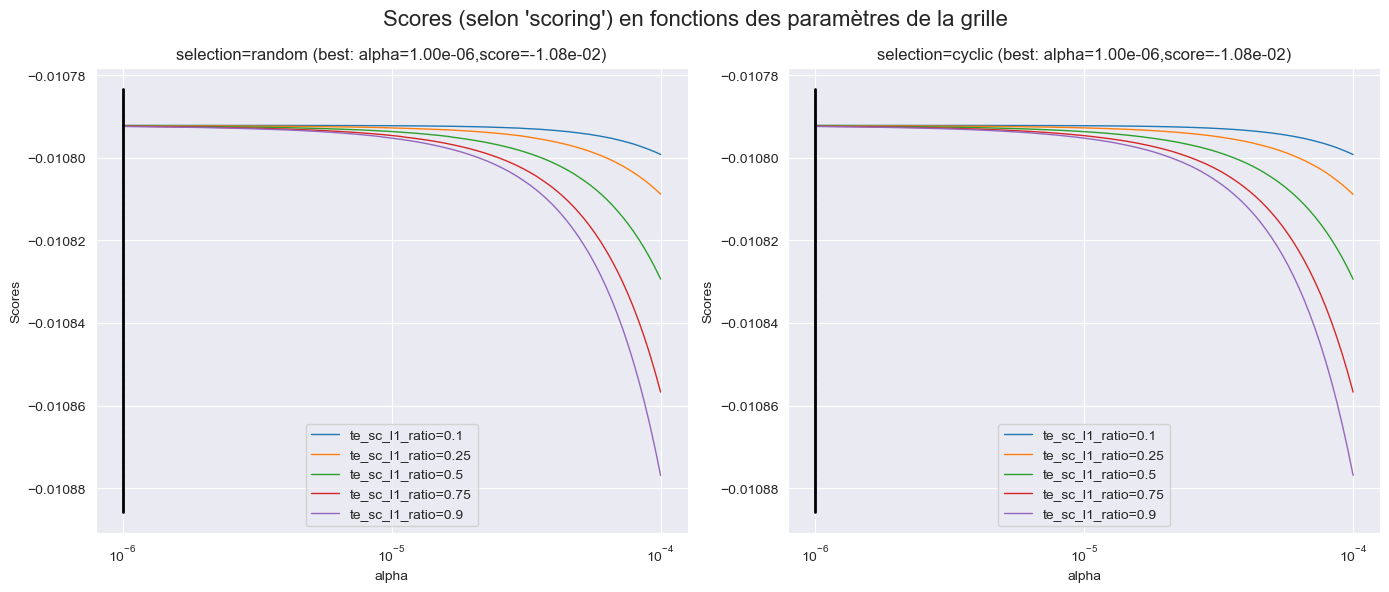

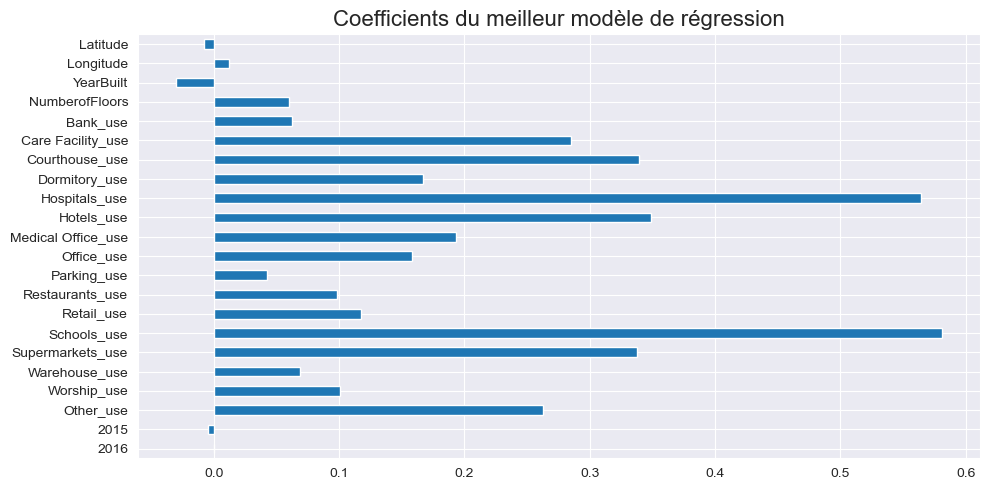

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


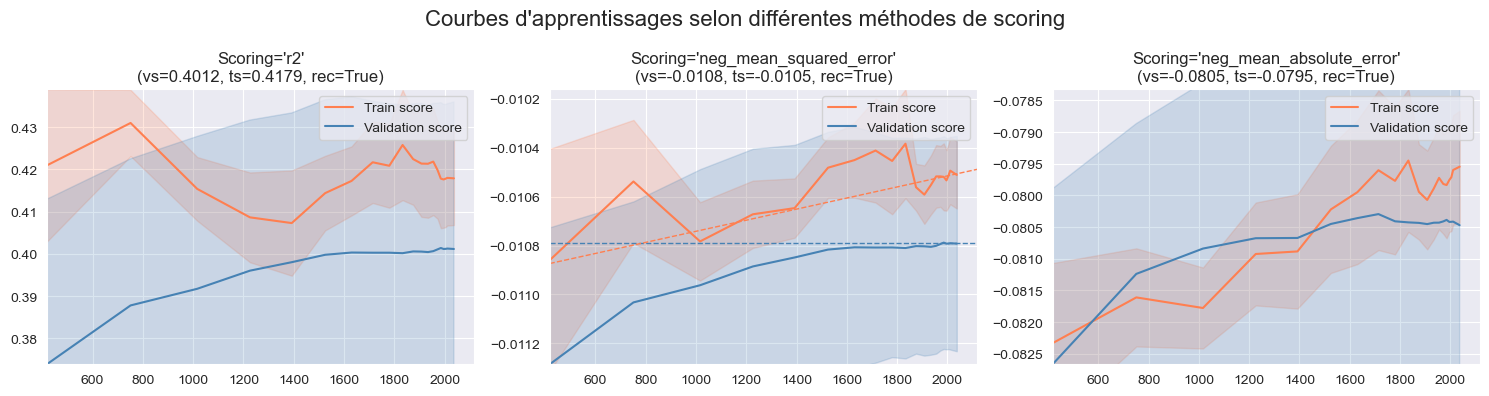



 Modèle : ElasticNet - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = ElasticNet(alpha=2.1544346900318867e-05, l1_ratio=0.9, max_iter=100000,
           random_state=0, selection='random')
  → Meilleurs paramètres = {'alpha': 2.1544346900318867e-05, 'l1_ratio': 0.9, 'selection': 'random'}
  → Meilleur score d'entrainement  = -0.0076
  → Temps de recherche = 0:00:07.414665
  → Scores en fonction des paramètres de la grille :


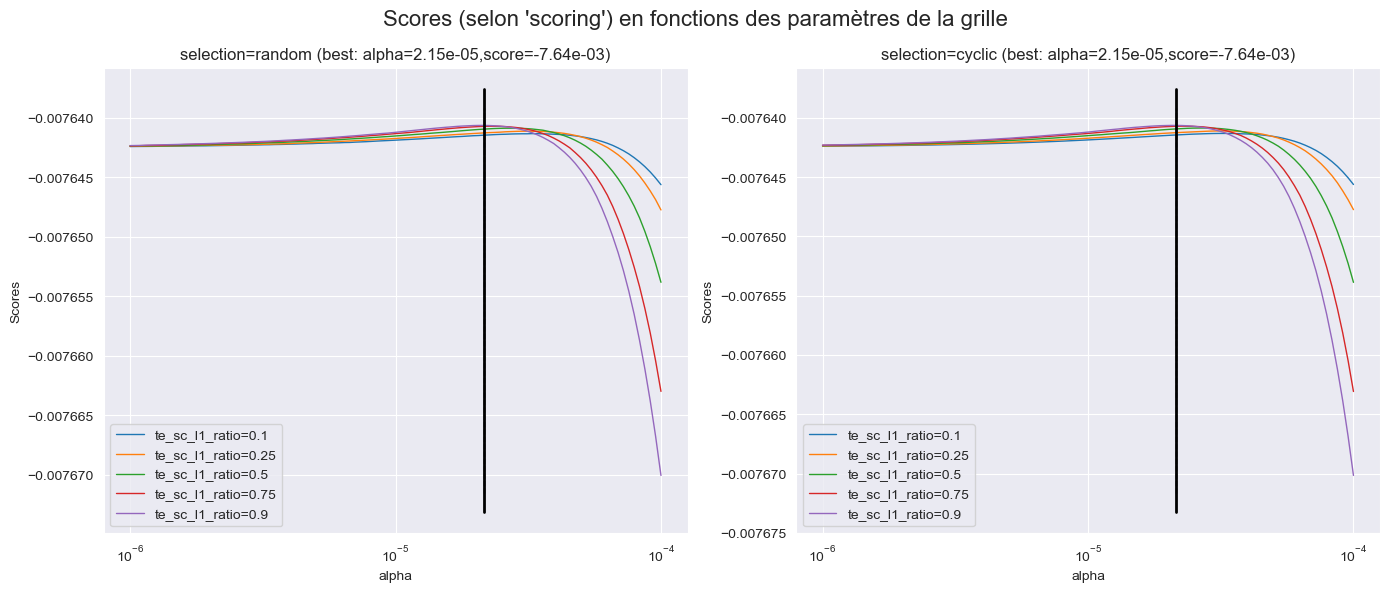

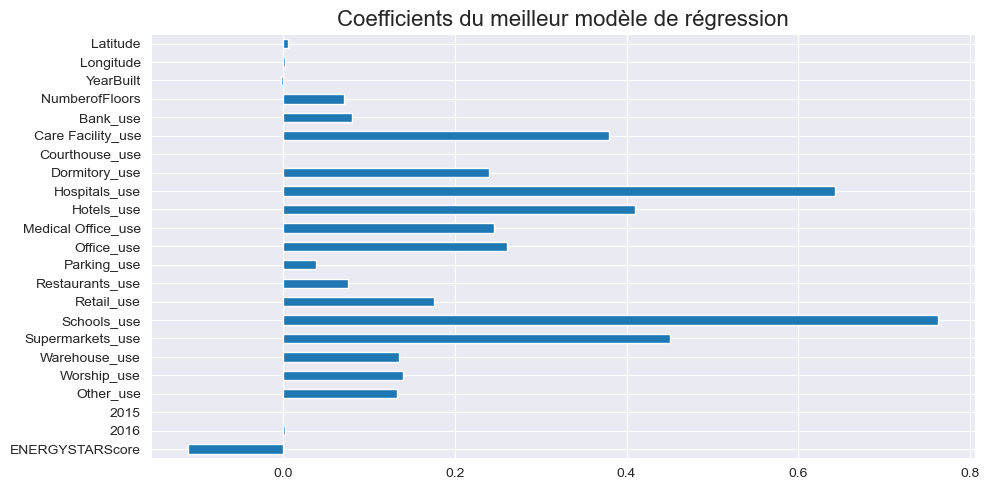

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


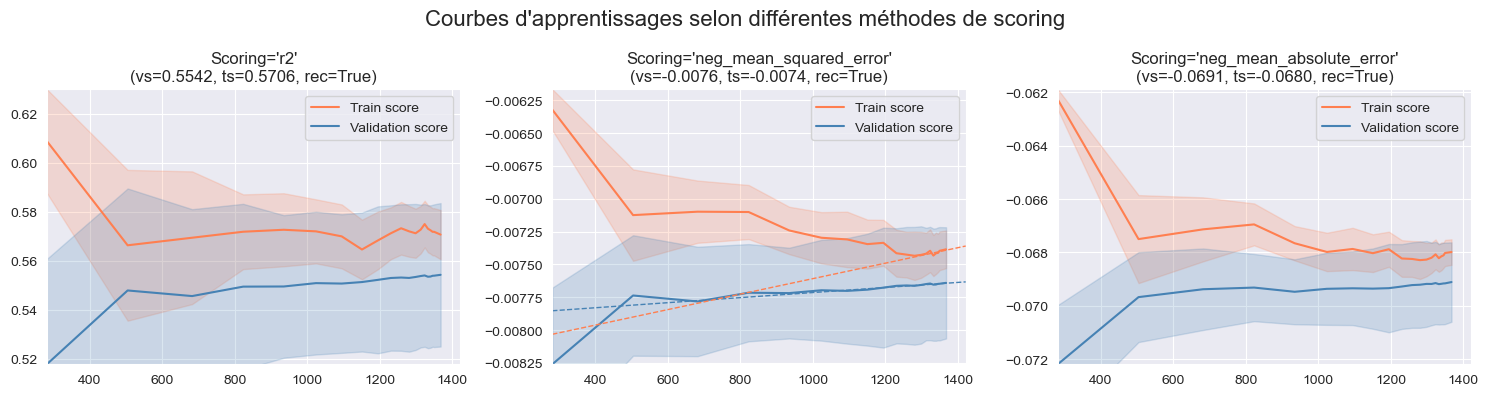

In [11]:
from sklearn.linear_model import ElasticNet
model, model_name = fct.append_model(ElasticNet(fit_intercept=True, random_state=rs, max_iter=100000))

# Définition des grilles de recherche
n_alphas = 100
alphas = np.logspace(-6, -4, n_alphas)
fit_intercepts = [False, True]
l1_ratios = [0.1, 0.25, 0.5, 0.75, 0.9]
selections = ['random', 'cyclic']

param_grid = {}
param_grid[targets[0]] = {'alpha': alphas,
                          'selection': selections,
                          'l1_ratio': l1_ratios}
param_grid[targets[1]] = {'alpha': alphas,
                          'selection': selections,
                          'l1_ratio': l1_ratios}
param_grid[targets[2]] = {'alpha': alphas,
                          'selection': selections,
                          'l1_ratio': l1_ratios}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='alpha', scale='log')
    fct.plot_estimator_coef(gr[idx].best_estimator_, f_names[idx])
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

## 6 - Modèles non linéaires
Ces 3 modèles non linéaires ont des performances un cran au-dessus de celles des modèles linéaires, mais avec un temps de calcul plus important, surtout s'agissant du MPL.
La modélisation des émissions de GES donne des performances proches avec ou sans l’EnergyStarScore.

<a id="krsvm"></a>
### 6.1 SVM à noyau
Ce modèle apporte un niveau de performance supérieur aux modèles de régression linéaires précédemment étudiés, contre un temps d'entrainement qui reste très faible.
Les modélisations des émissions de GES avec ou sans l'EnergyStarScore ont des scores très proches.



 Modèle : SVR - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = SVR(C=0.8254041852680184)
  → Meilleurs paramètres = {'C': 0.8254041852680184, 'gamma': 'scale', 'kernel': 'rbf'}
  → Meilleur score d'entrainement  = -0.0048
  → Temps de recherche = 0:00:43.737152
  → Scores en fonction des paramètres de la grille :


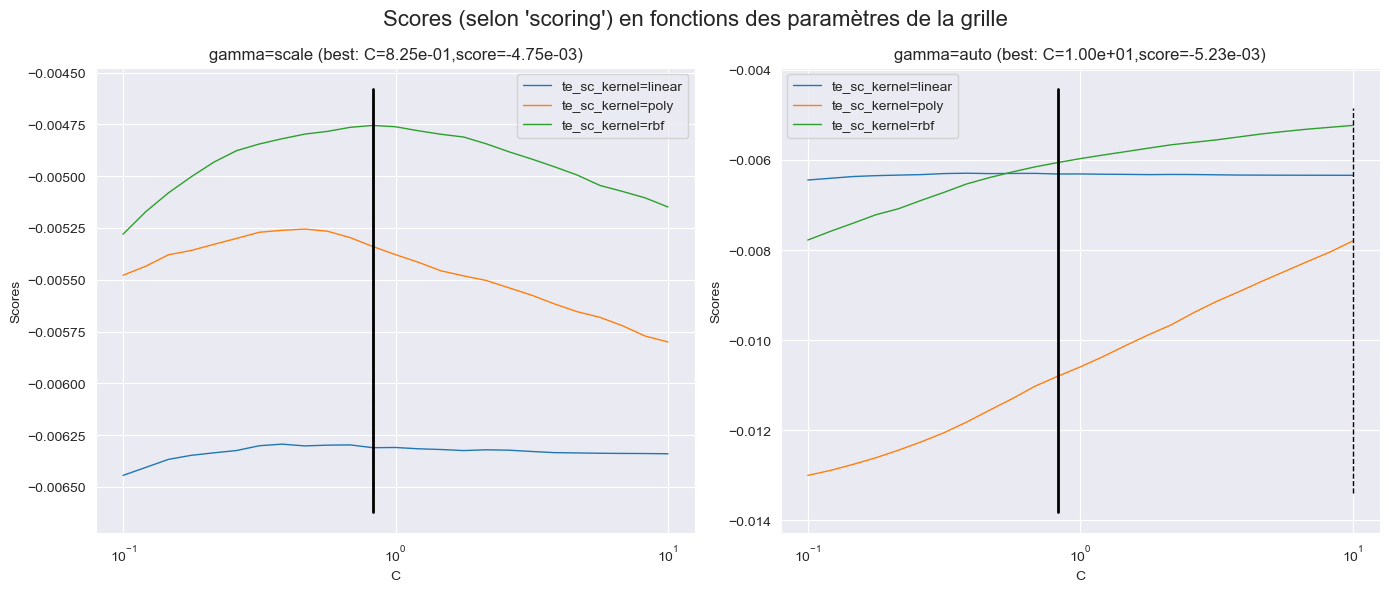

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


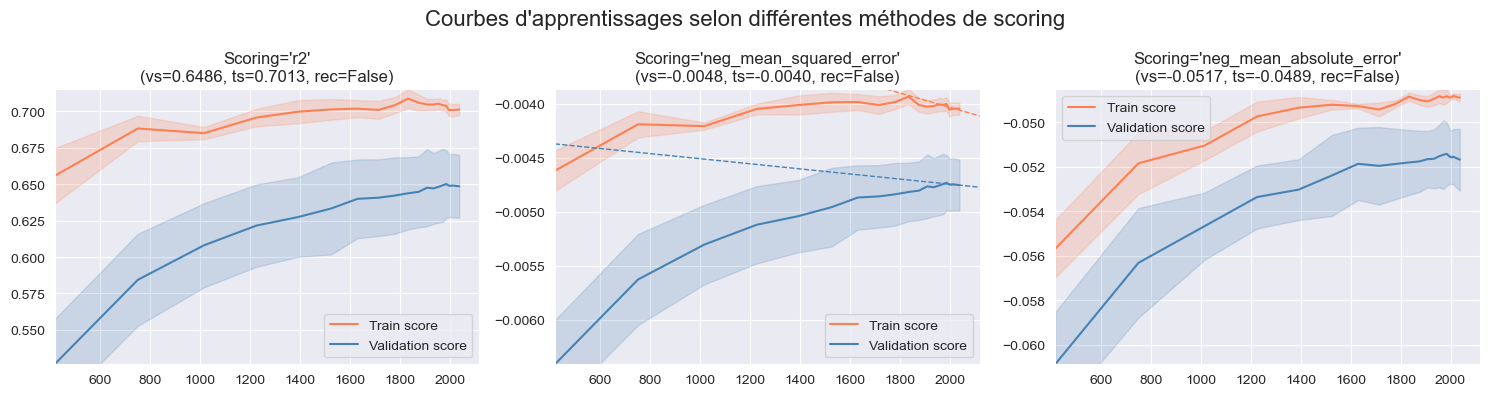



 Modèle : SVR - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = SVR(C=0.5623413251903491)
  → Meilleurs paramètres = {'C': 0.5623413251903491, 'gamma': 'scale', 'kernel': 'rbf'}
  → Meilleur score d'entrainement  = -0.0089
  → Temps de recherche = 0:02:22.046423
  → Scores en fonction des paramètres de la grille :


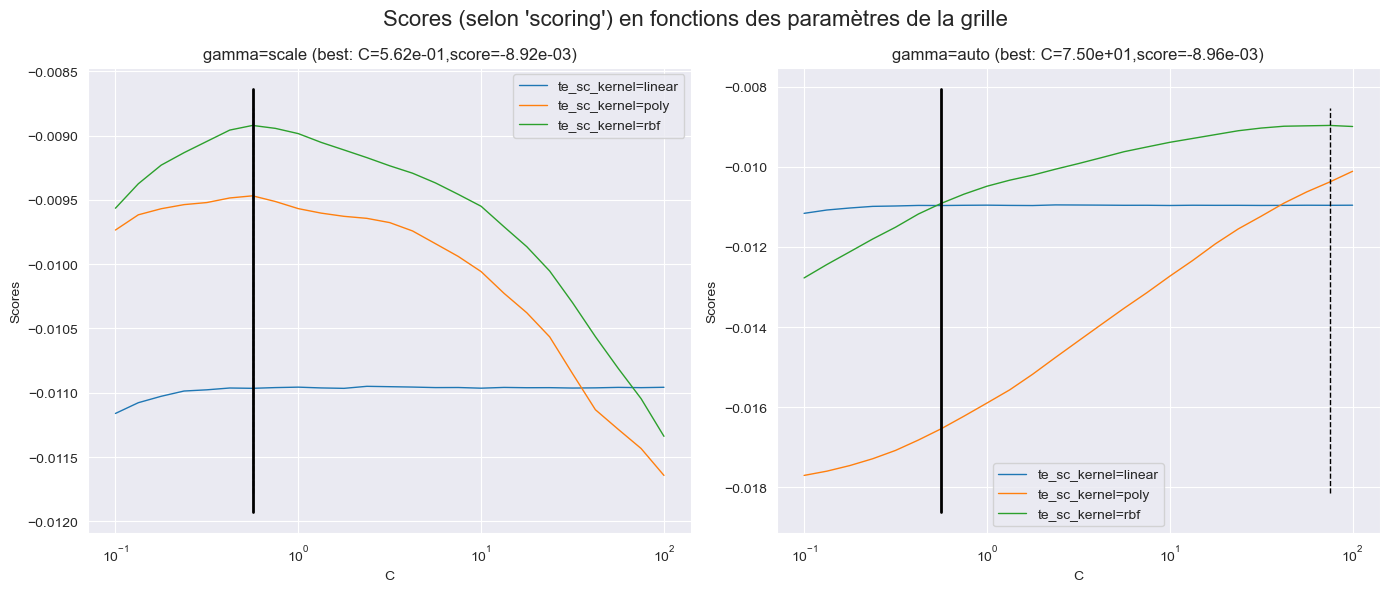

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


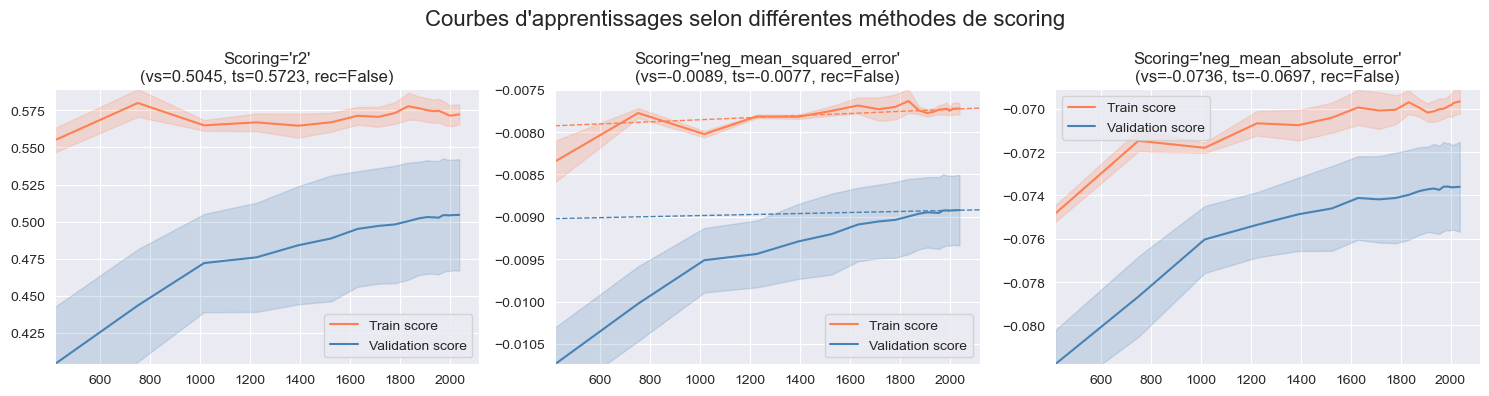



 Modèle : SVR - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = SVR(C=237.13737056616552, gamma='auto')
  → Meilleurs paramètres = {'C': 237.13737056616552, 'gamma': 'auto', 'kernel': 'rbf'}
  → Meilleur score d'entrainement  = -0.0067
  → Temps de recherche = 0:04:35.604400
  → Scores en fonction des paramètres de la grille :


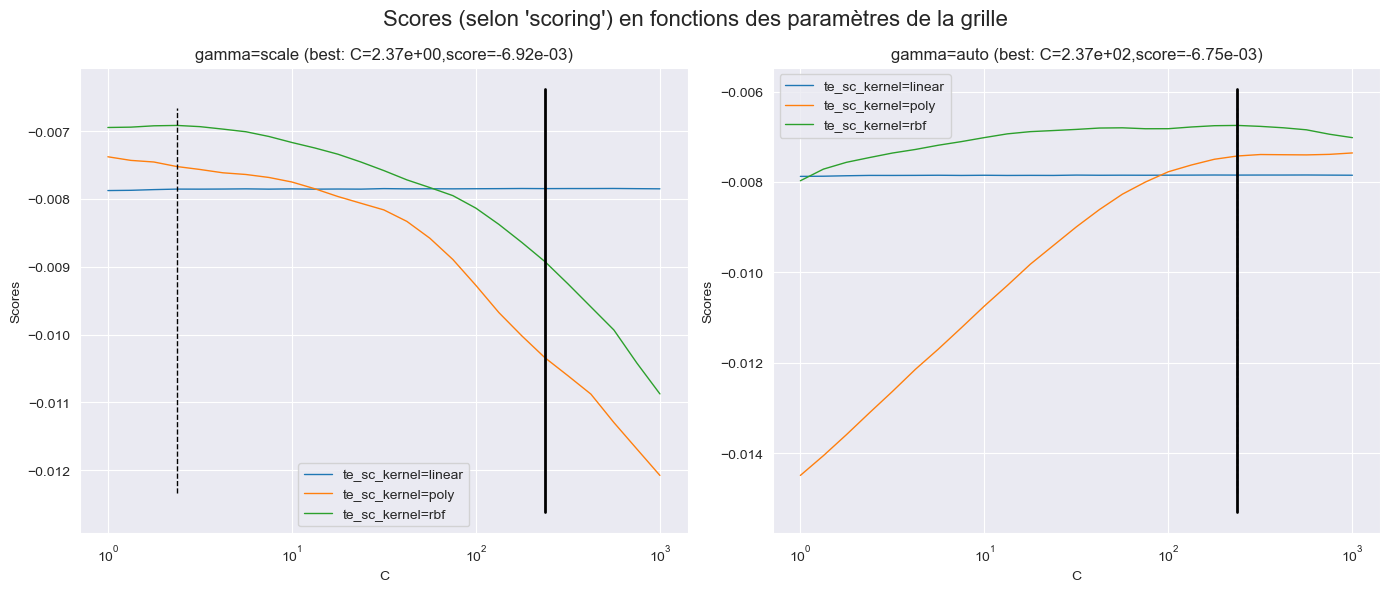

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


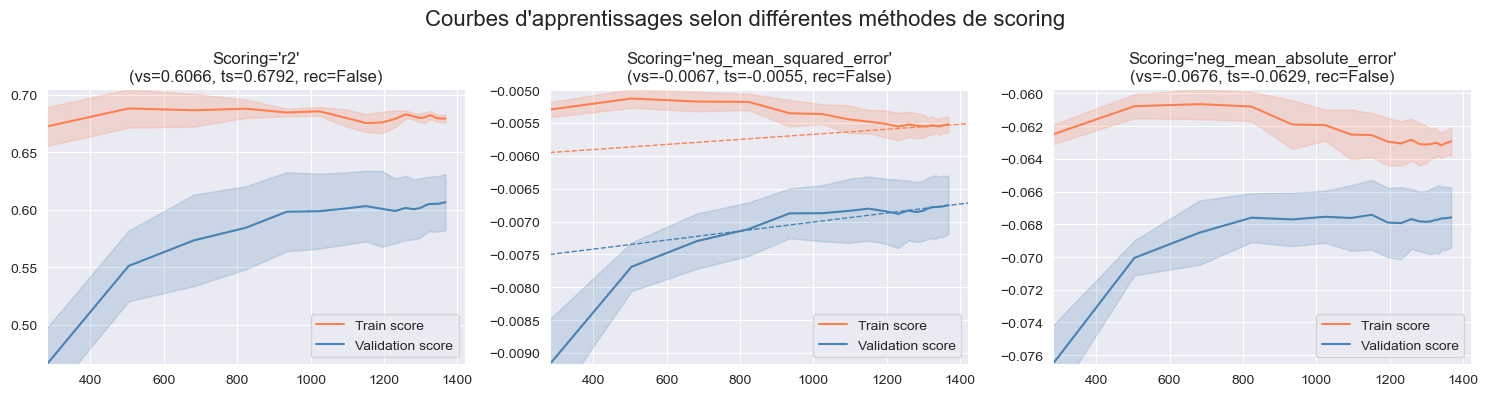

In [12]:
from sklearn.svm import SVR
model, model_name = fct.append_model(SVR(tol=1e-3, epsilon=0.1, degree=3))

# Définition des grilles de recherche
kernels = ['linear', 'poly', 'rbf']
gammas = ['scale', 'auto']
# C: Faire décroitre C correspond à une plus grande régularisation

param_grid = {}
param_grid[targets[0]] = {'kernel': kernels,
                          'gamma': gammas,
                          'C': np.logspace(-1, 1, 25)}
param_grid[targets[1]] = {'kernel': kernels,
                          'gamma': gammas,
                          'C': np.logspace(-1, 2, 25)}
param_grid[targets[2]] = {'kernel': kernels,
                          'gamma': gammas,
                          'C': np.logspace(0, 3, 25)}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='C', scale='log')
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

<a id="krr"></a>
### 6.2 ridge à noyau
Ce modèle apporte un niveau de performance encore supérieur à celui de la SVM à noyau, avec un temps d'entrainement plus important, mais qui reste très faible.
Les courbes d'apprentissage montent un modèle mieux adapté que les précédents pour estimer nos cibles, avec une meilleure capacité à généraliser, mais avec un score qui reste à améliorer, ce qui semblerait possible avec des données supplémentaires.
Les modélisations des émissions de GES avec ou sans l'EnergyStarScore ont des scores très proches.

[<font color='red'><em>retour sommaire</em></font>](#sommaire)



 Modèle : KernelRidge - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = KernelRidge(alpha=0.00017575106248547912, degree=2, kernel='poly')
  → Meilleurs paramètres = {'alpha': 0.00017575106248547912, 'degree': 2, 'kernel': 'poly'}
  → Meilleur score d'entrainement  = -0.0043
  → Temps de recherche = 0:04:07.721427
  → Scores en fonction des paramètres de la grille :


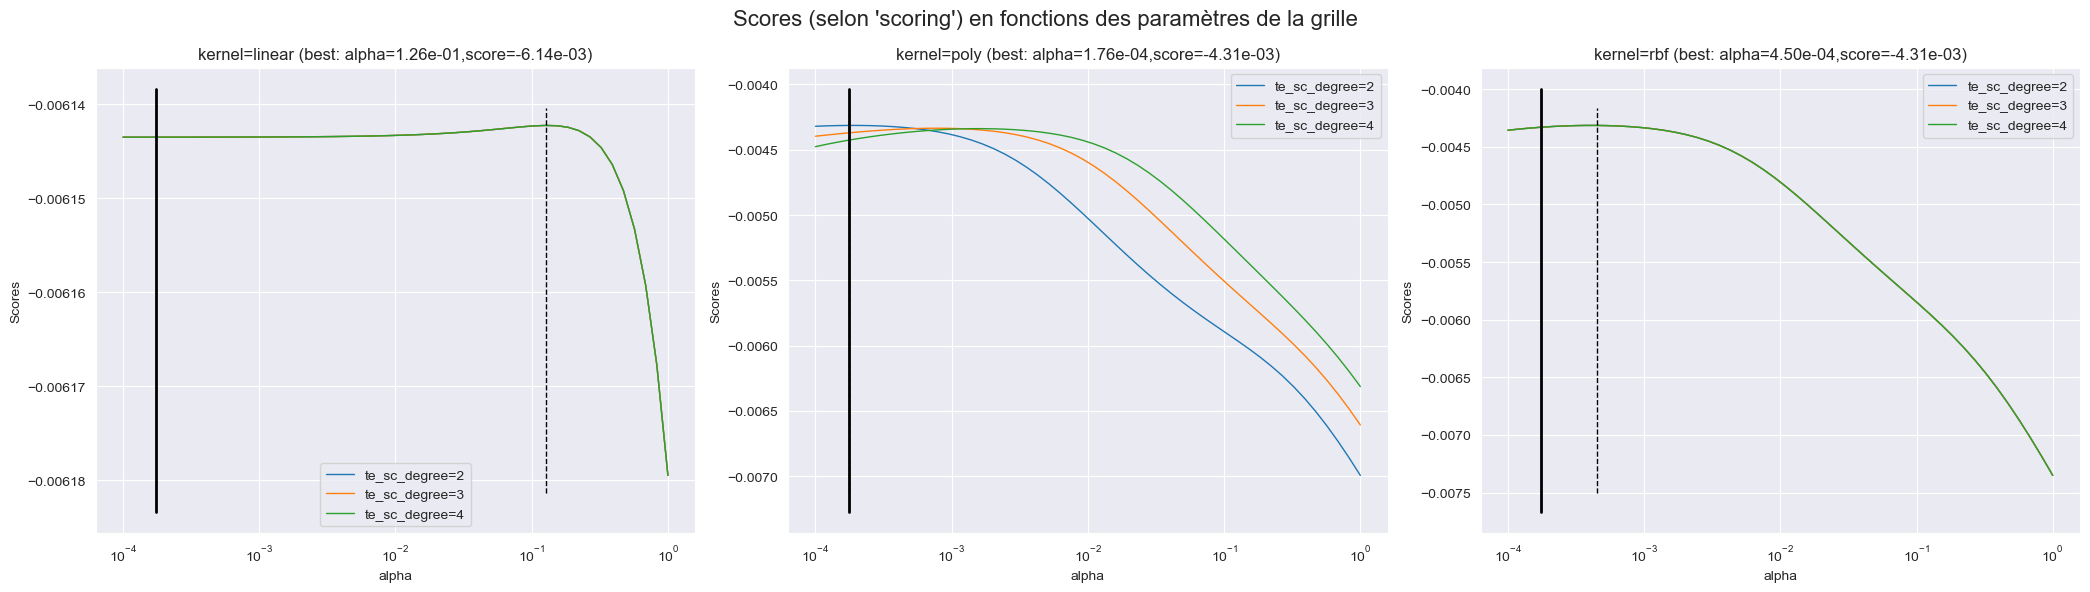

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


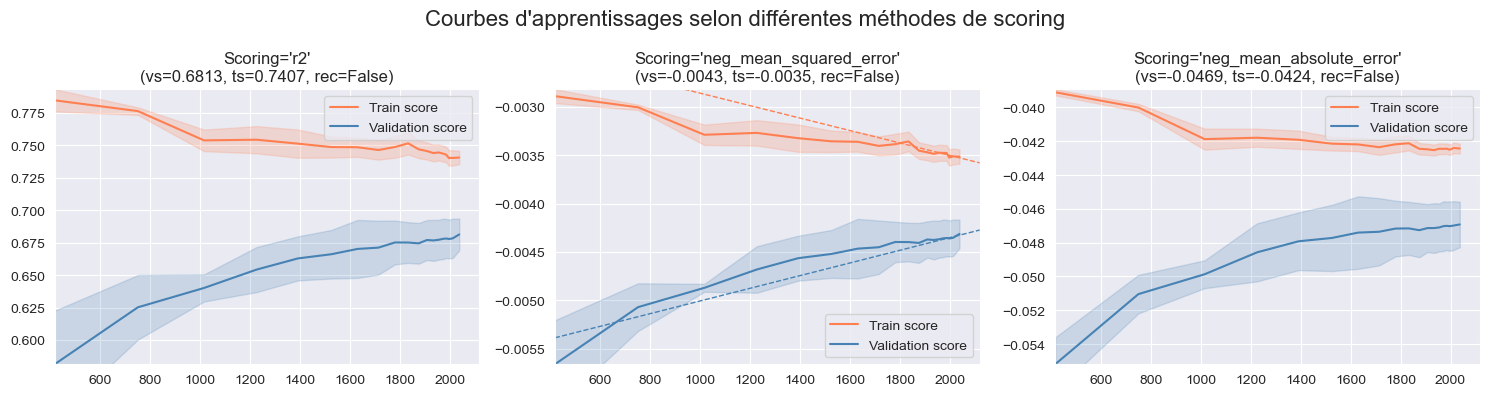



 Modèle : KernelRidge - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = KernelRidge(alpha=0.0002559547922699536, degree=2, kernel='poly')
  → Meilleurs paramètres = {'alpha': 0.0002559547922699536, 'degree': 2, 'kernel': 'poly'}
  → Meilleur score d'entrainement  = -0.0087
  → Temps de recherche = 0:04:03.131954
  → Scores en fonction des paramètres de la grille :


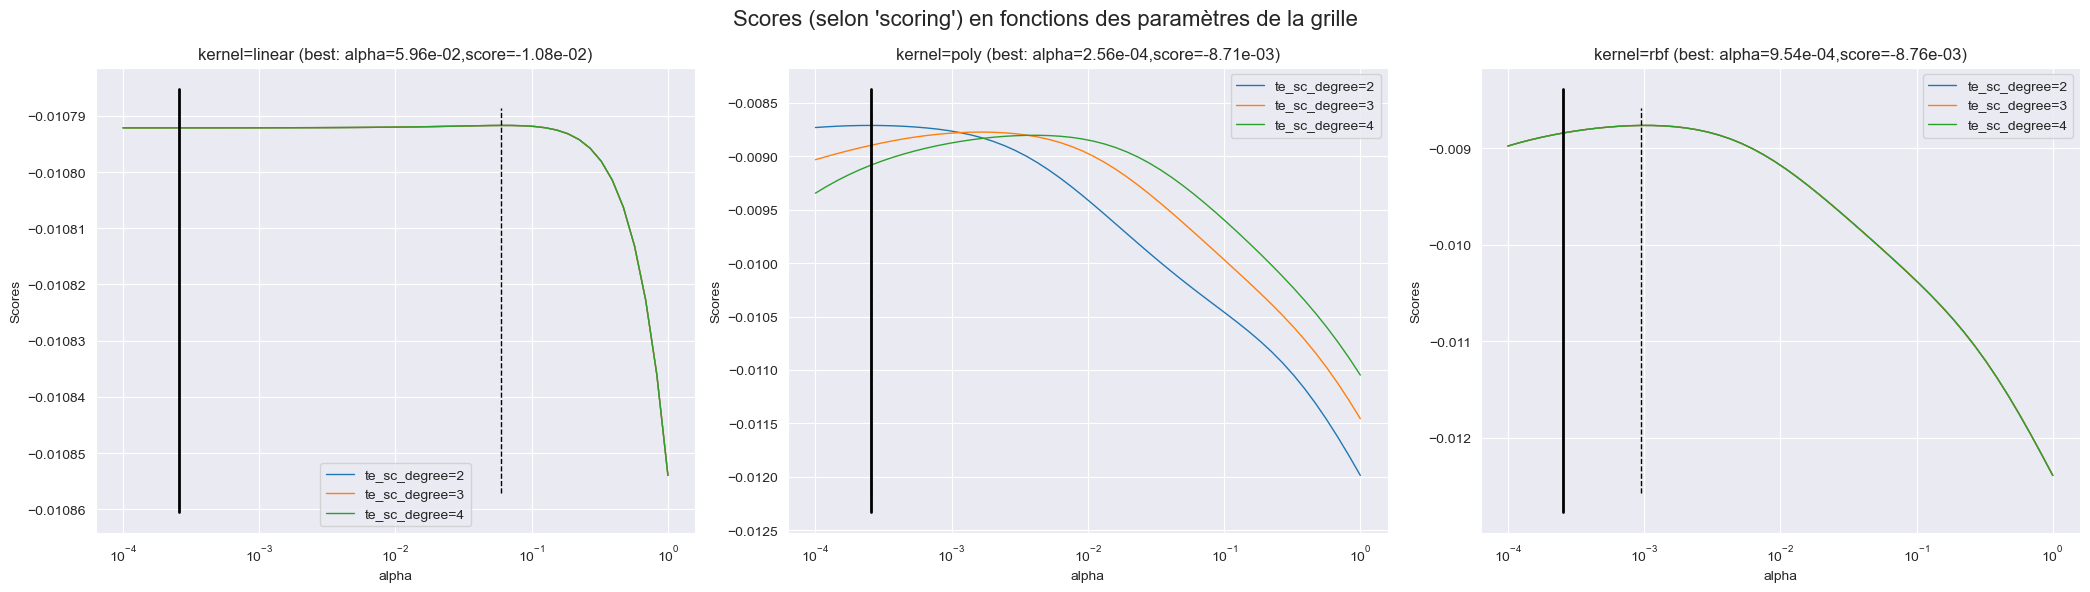

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


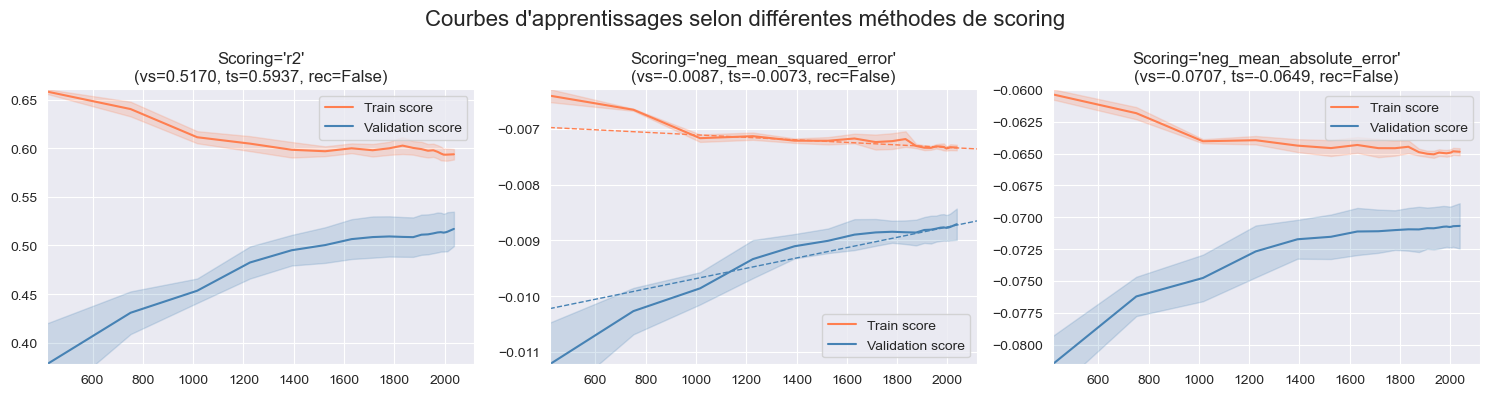



 Modèle : KernelRidge - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = KernelRidge(alpha=0.0007906043210907702, degree=2, kernel='poly')
  → Meilleurs paramètres = {'alpha': 0.0007906043210907702, 'degree': 2, 'kernel': 'poly'}
  → Meilleur score d'entrainement  = -0.0062
  → Temps de recherche = 0:01:37.537656
  → Scores en fonction des paramètres de la grille :


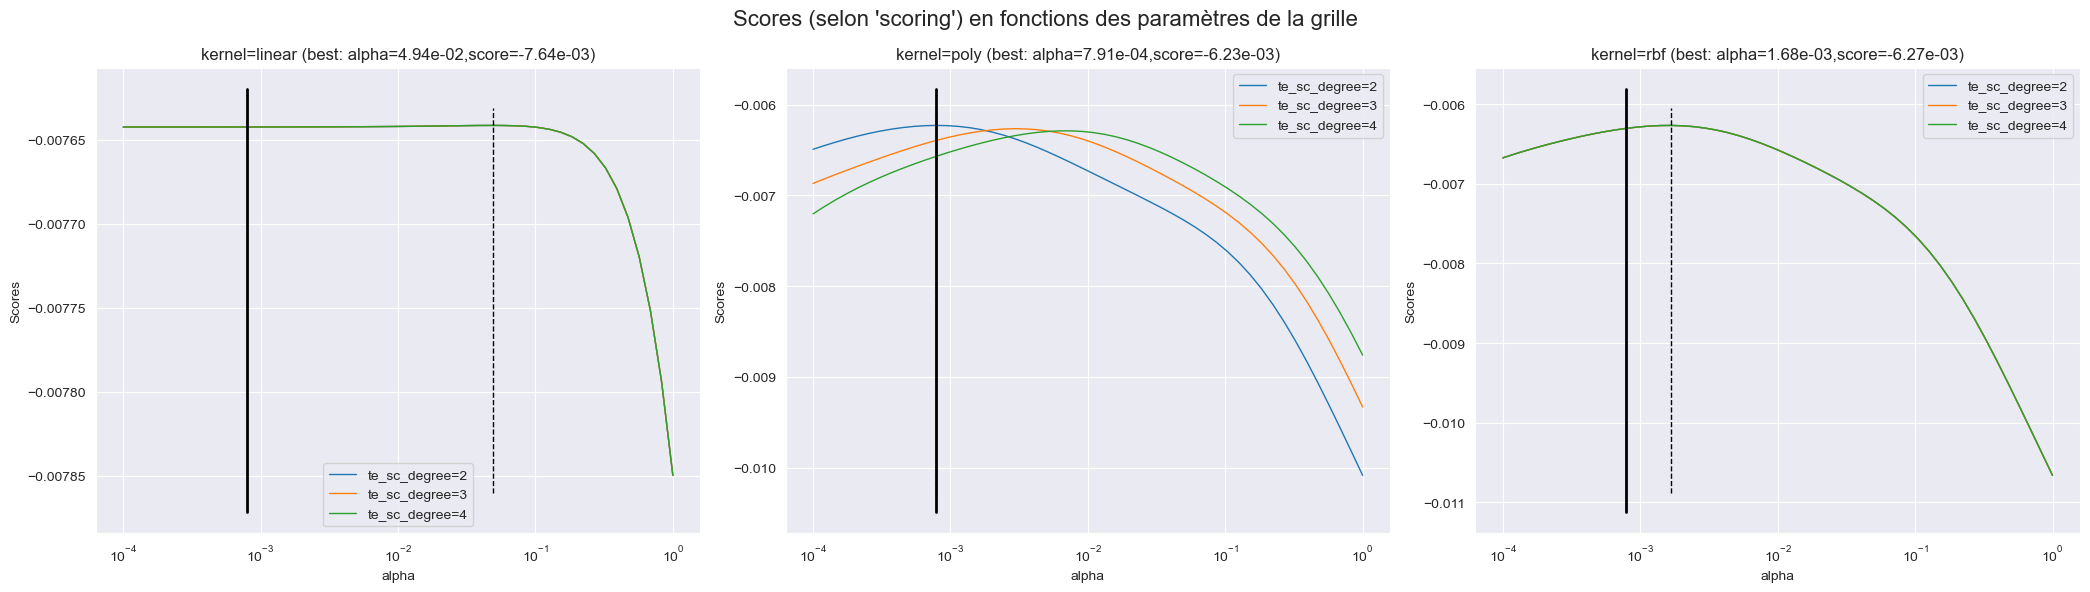

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


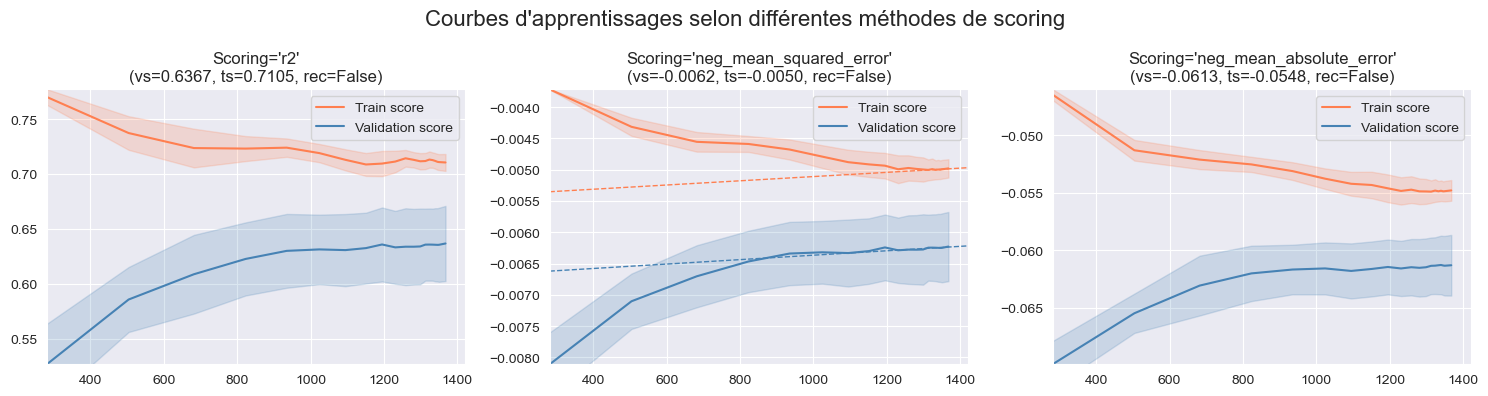

In [13]:
from sklearn.kernel_ridge import KernelRidge
model, model_name = fct.append_model(KernelRidge())

# Définition des grilles de recherche
kernels = ['linear', 'poly', 'rbf']
degrees = np.array(range(2,5))

param_grid = {}
param_grid[targets[0]] = {'alpha': np.logspace(-4, 0, 50),
                          'kernel': kernels,
                          'degree': degrees}
param_grid[targets[1]] = {'alpha': np.logspace(-4, 0, 50),
                          'kernel': kernels,
                          'degree': degrees}
param_grid[targets[2]] = {'alpha': np.logspace(-4, 0, 50),
                          'kernel': kernels,
                          'degree': degrees}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='alpha', scale='log')
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="mlp"></a>
### 6.3 MLP - réseau de neurones
La performance du modèle MPL est du même ordre que celle des 2 autres modèles SVR et KRR tout en étant un peu meilleure. En revanche, le temps de calcul est sensiblement plus long d'un facteur 10.
Les courbes d'apprentissage montrent un besoin important en données supplémentaires pour améliorer le modèle.




 Modèle : MLPRegressor - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = MLPRegressor(alpha=0.1, max_iter=10000, random_state=0, solver='lbfgs')
  → Meilleurs paramètres = {'activation': 'relu', 'alpha': 0.1, 'solver': 'lbfgs'}
  → Meilleur score d'entrainement  = -0.0040
  → Temps de recherche = 0:01:20.286186
  → Scores en fonction des paramètres de la grille :


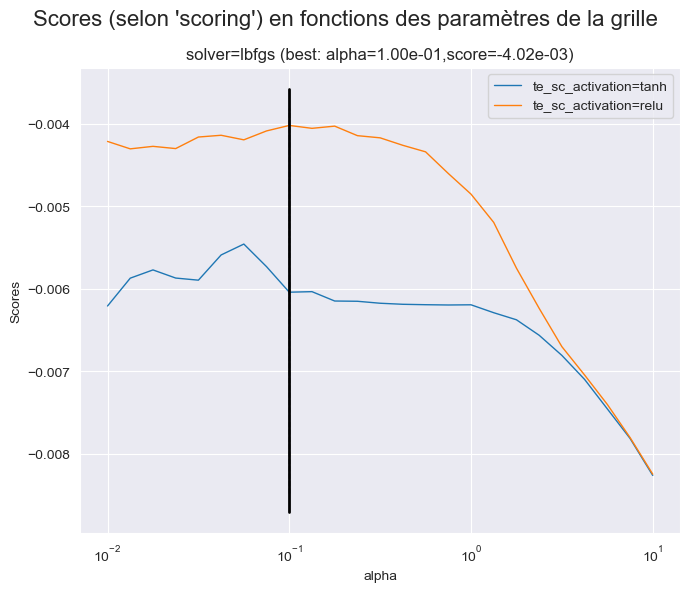

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


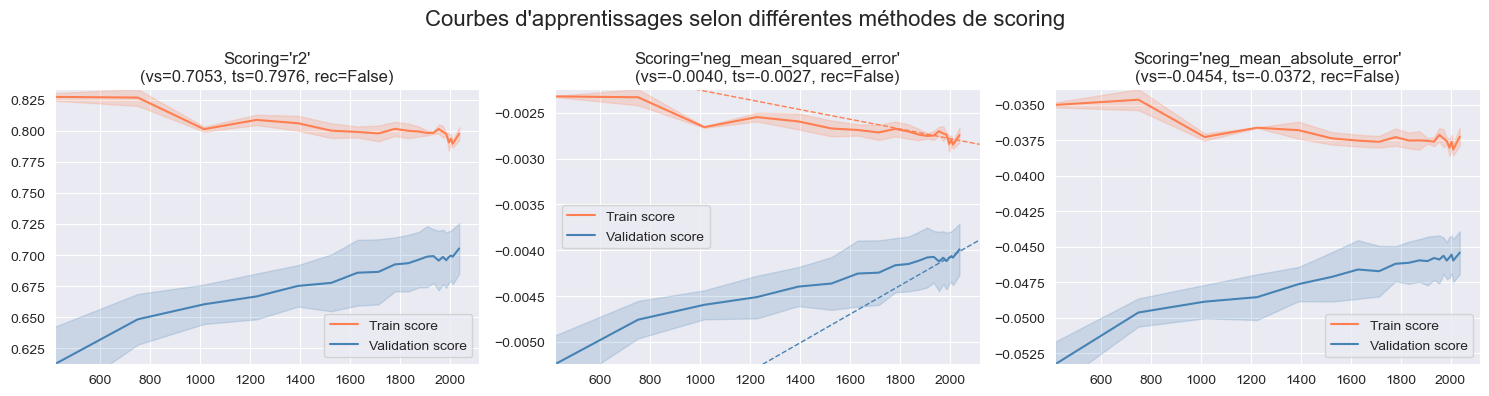



 Modèle : MLPRegressor - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = MLPRegressor(alpha=0.31622776601683794, max_iter=10000, random_state=0,
             solver='lbfgs')
  → Meilleurs paramètres = {'activation': 'relu', 'alpha': 0.31622776601683794, 'solver': 'lbfgs'}
  → Meilleur score d'entrainement  = -0.0082
  → Temps de recherche = 0:02:38.025440
  → Scores en fonction des paramètres de la grille :


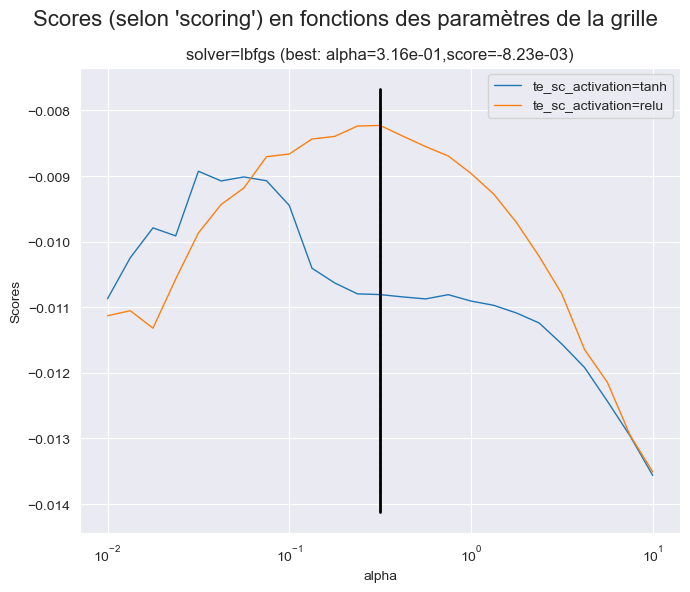

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


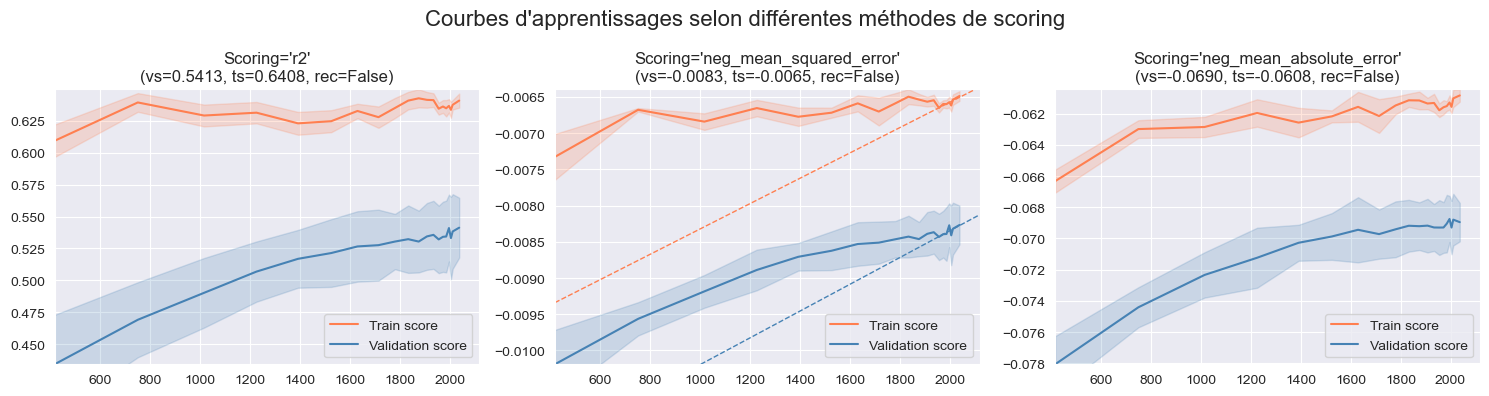



 Modèle : MLPRegressor - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = MLPRegressor(alpha=0.1778279410038923, max_iter=10000, random_state=0,
             solver='lbfgs')
  → Meilleurs paramètres = {'activation': 'relu', 'alpha': 0.1778279410038923, 'solver': 'lbfgs'}
  → Meilleur score d'entrainement  = -0.0059
  → Temps de recherche = 0:01:25.620286
  → Scores en fonction des paramètres de la grille :


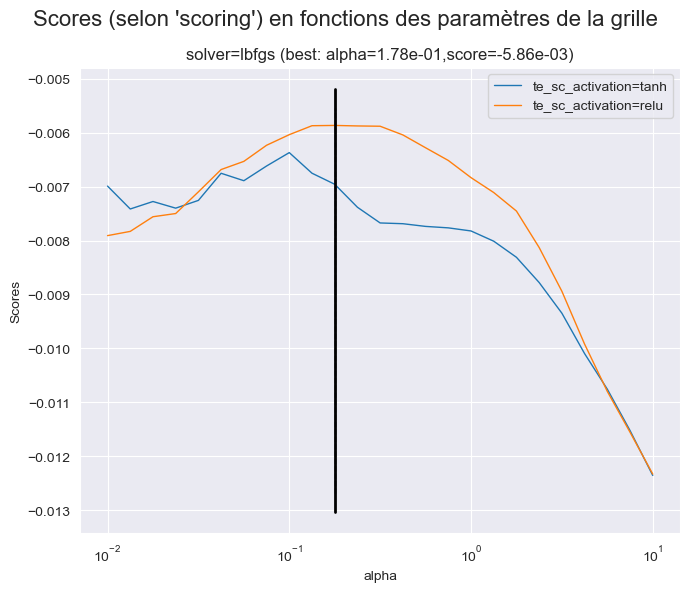

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


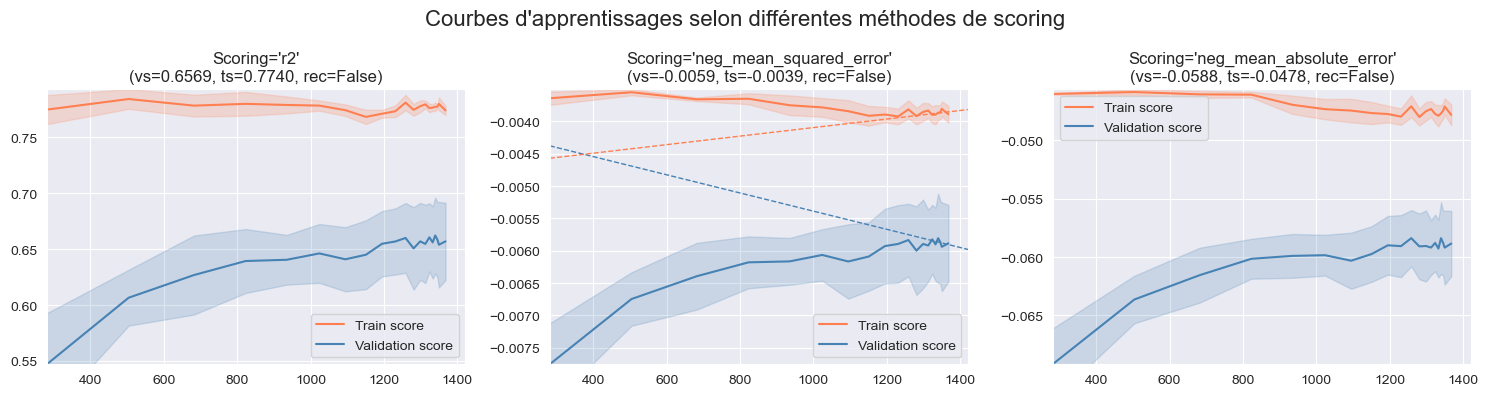

In [14]:
from sklearn.neural_network import MLPRegressor
model, model_name = fct.append_model(MLPRegressor(random_state=rs, max_iter=10000, learning_rate='constant', tol=1e-4))

# Définition des grilles de recherche
activations = ['tanh', 'relu']
#solvers = ['lbfgs', 'sgd', 'adam']

param_grid = {}
param_grid[targets[0]] = {'alpha': np.logspace(-2, 1, 25),
                          'activation': activations,
                          'solver': ['lbfgs']}
param_grid[targets[1]] = {'alpha': np.logspace(-2, 1, 25),
                          'activation': activations,
                          'solver': ['lbfgs']}
param_grid[targets[2]] = {'alpha': np.logspace(-2, 1, 25),
                          'activation': activations,
                          'solver': ['lbfgs']}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='alpha', scale='log')
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

## 7 - Méthodes ensemblistes
Cette famille de modèle apporte les meilleures performances à la modélisation de nos cibles. Avec l'amélioration de ces performances augmente les temps de calcul, mais à un niveau raisonnable (1 à 3 secondes d'entrainement). Les performances des modèles avec et sans EnergyStarScore se rapprochent.

<a id="random_forest"></a>
### 7.1 Random forest
Ce modèle apporte un niveau de performance sensiblement plus élevé que les modèles précédents, pour en coût en calcul du même niveau que celui du MLP.




 Modèle : RandomForestRegressor - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = RandomForestRegressor(max_features=14, n_estimators=400, random_state=0)
  → Meilleurs paramètres = {'max_features': 14, 'n_estimators': 400}
  → Meilleur score d'entrainement  = -0.0027
  → Temps de recherche = 0:08:48.797719
  → Scores en fonction des paramètres de la grille :


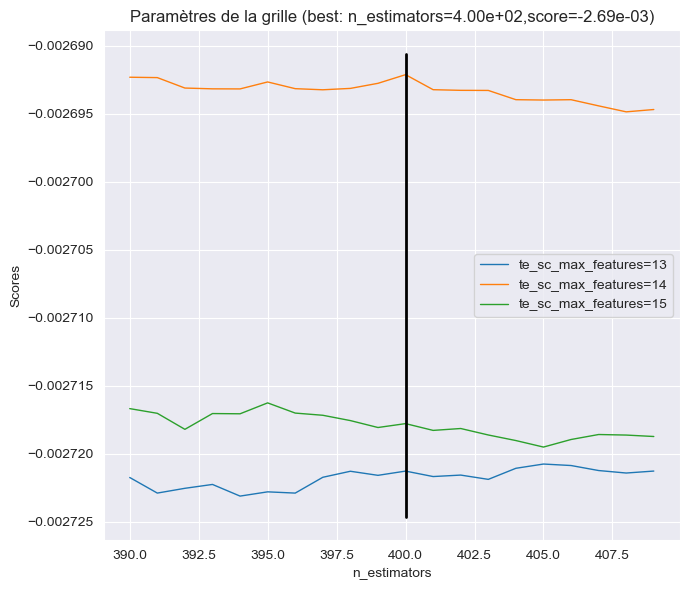

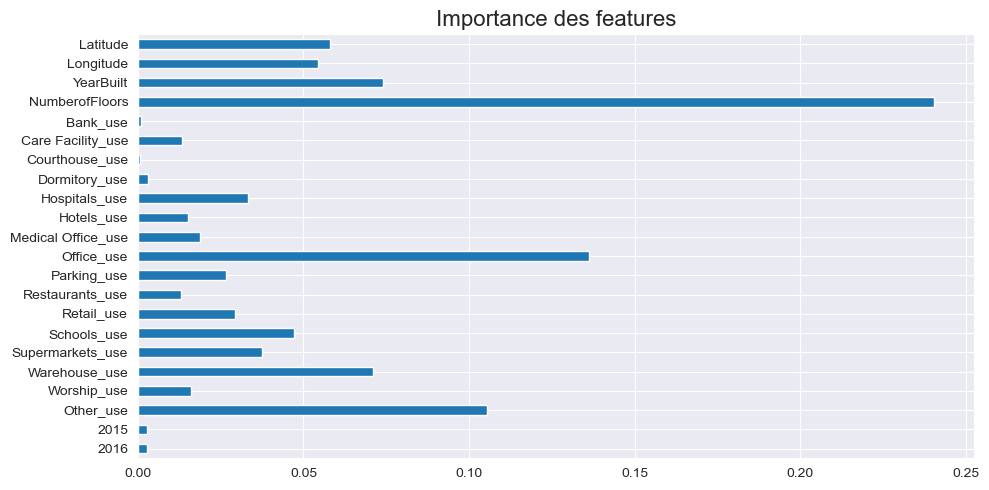

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


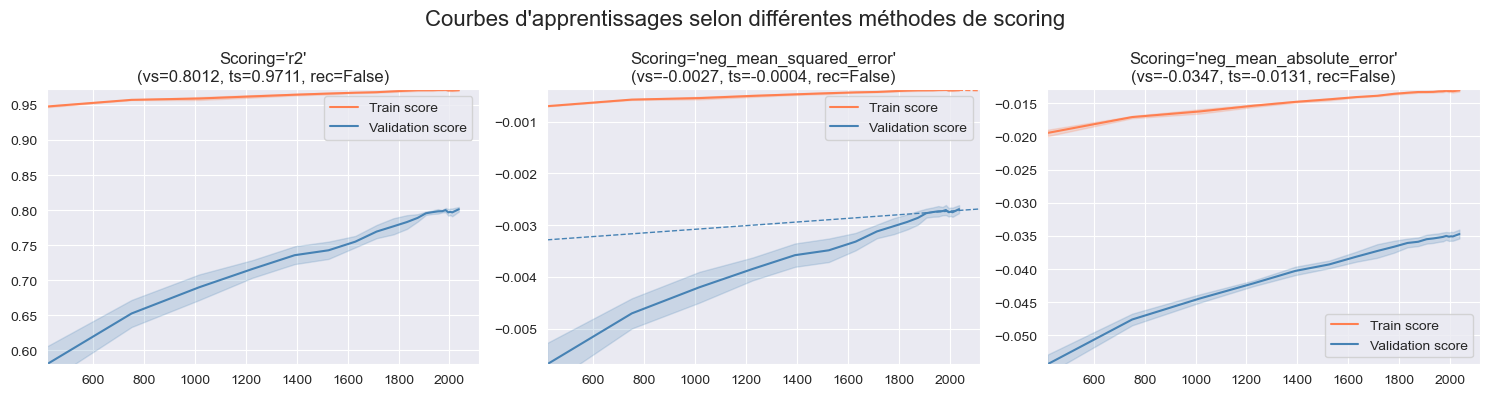



 Modèle : RandomForestRegressor - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = RandomForestRegressor(max_features=17, n_estimators=278, random_state=0)
  → Meilleurs paramètres = {'max_features': 17, 'n_estimators': 278}
  → Meilleur score d'entrainement  = -0.0051
  → Temps de recherche = 0:06:38.605104
  → Scores en fonction des paramètres de la grille :


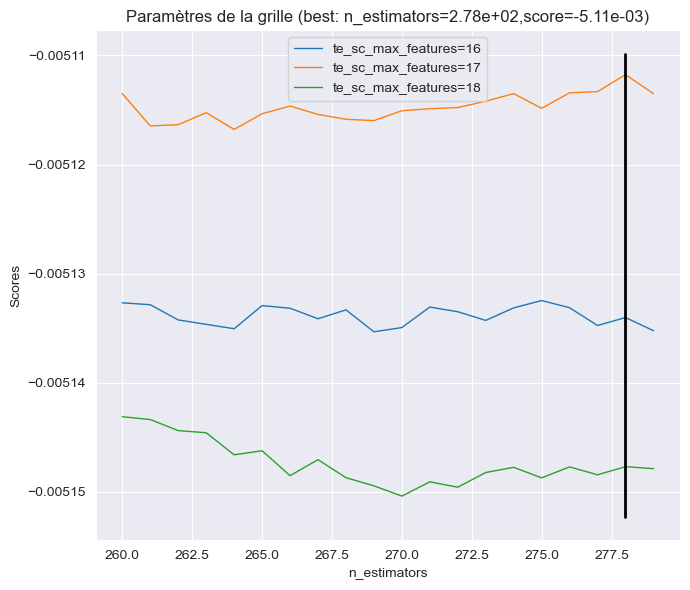

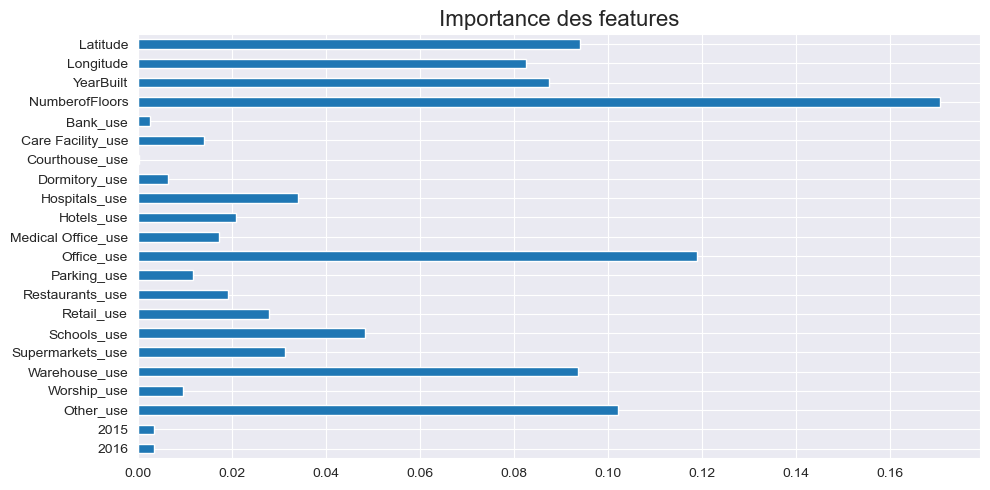

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


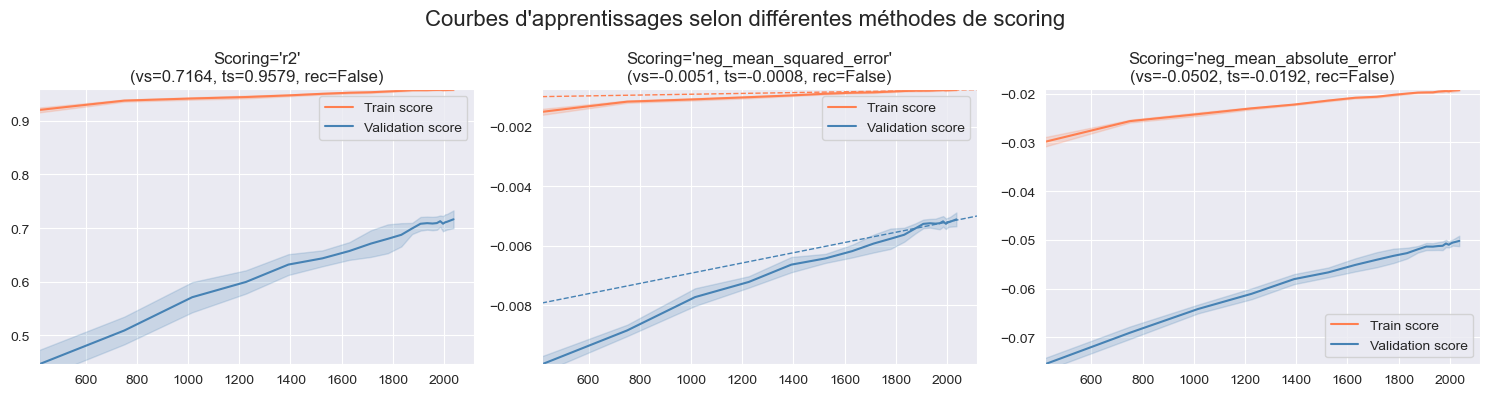



 Modèle : RandomForestRegressor - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = RandomForestRegressor(max_features=14, n_estimators=220, random_state=0)
  → Meilleurs paramètres = {'max_features': 14, 'n_estimators': 220}
  → Meilleur score d'entrainement  = -0.0041
  → Temps de recherche = 0:03:39.824169
  → Scores en fonction des paramètres de la grille :


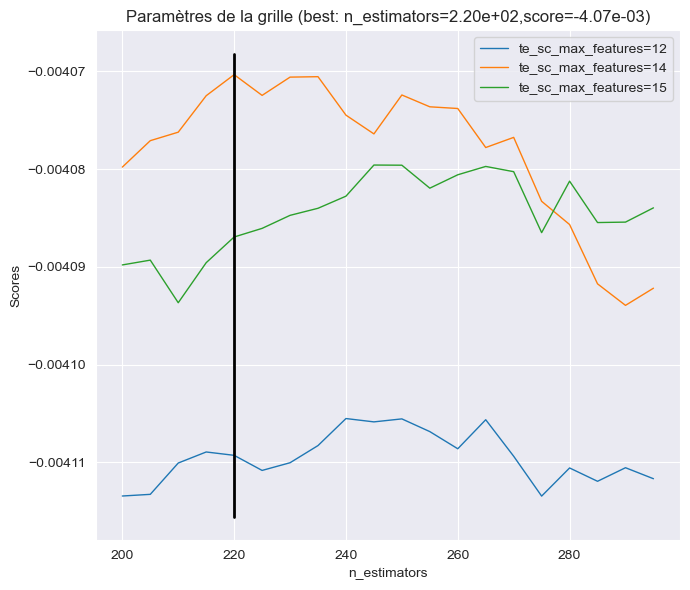

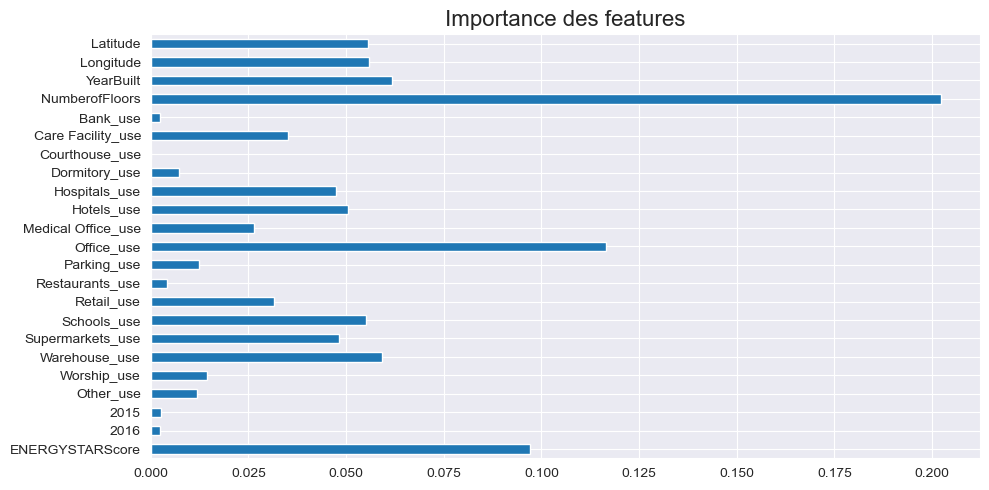

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


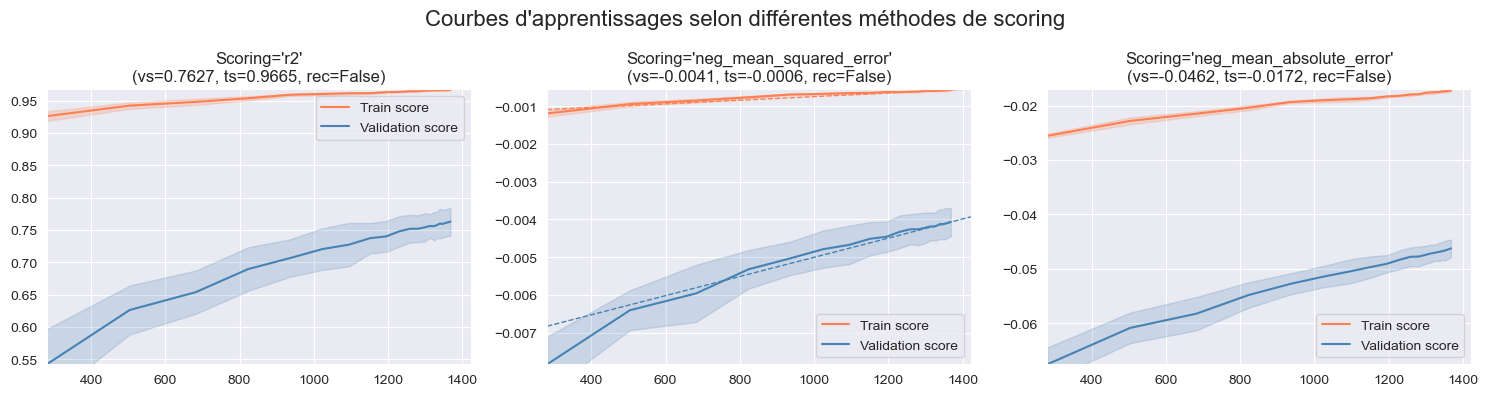

In [15]:
from sklearn.ensemble import RandomForestRegressor
model, model_name = fct.append_model(RandomForestRegressor(random_state=rs))

# Définition des grilles de recherche
param_grid = {}
param_grid[targets[0]] = {'n_estimators': np.array(range(390, 410)),
                          'max_features': [13, 14, 15]}
param_grid[targets[1]] = {'n_estimators': np.array(range(260, 280)),
                          'max_features': [16, 17, 18]}
param_grid[targets[2]] = {'n_estimators': np.array(range(200, 300, 5)),
                          'max_features': [12, 14, 15]}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='n_estimators', scale='linear')
    fct.plot_feature_importance(gr[idx].best_estimator_, f_names[idx])
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="adaboost"></a>
### 7.2.1 AdaBoost
Pour ce modèle, nous utilisons un apprenant de type 'DecisionTreeRegressor' sans limitation de profondeur. En effet, l'apprenant par défaut est limité avec max_depth=3, ce qui conduit à de mauvais résultats.
Ce modèle étant celui finalement sélectionné, nous avons recherché une optimisation des paramètres afin de maximiser le score, au détriment du temps de calcul d'entrainement du modèle (l'augmentation de n_estimators augmente le temps d'entrainement). Cela nous a permis de produire la meilleure performance de modèle.
En particulier, la cible d'émission de GES sans l'EnergyStarScore a un score d'estimation plus élevé que celui de la modélisation avec l'EnergyStarScore.

Par ailleurs, nous constatons un gap entre le score d'entrainement et le score de validation, ce qui nous a conduit à explorer la possibilité de réduire ce gap pour conclure que cela n'apporte pas d'amélioration.

#### 7.2.1 Modélisation AdaBoost avec recherche du meilleur score
Cette section recherche le modèle optimal avec AdaBoostRegressor.



 Modèle : AdaBoostRegressor - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='auto',
                                                       random_state=0),
                  learning_rate=1.5, n_estimators=193, random_state=0)
  → Meilleurs paramètres = {'learning_rate': 1.5, 'loss': 'linear', 'n_estimators': 193}
  → Meilleur score d'entrainement  = -0.0023
  → Temps de recherche = 0:12:50.101983
  → Scores en fonction des paramètres de la grille :


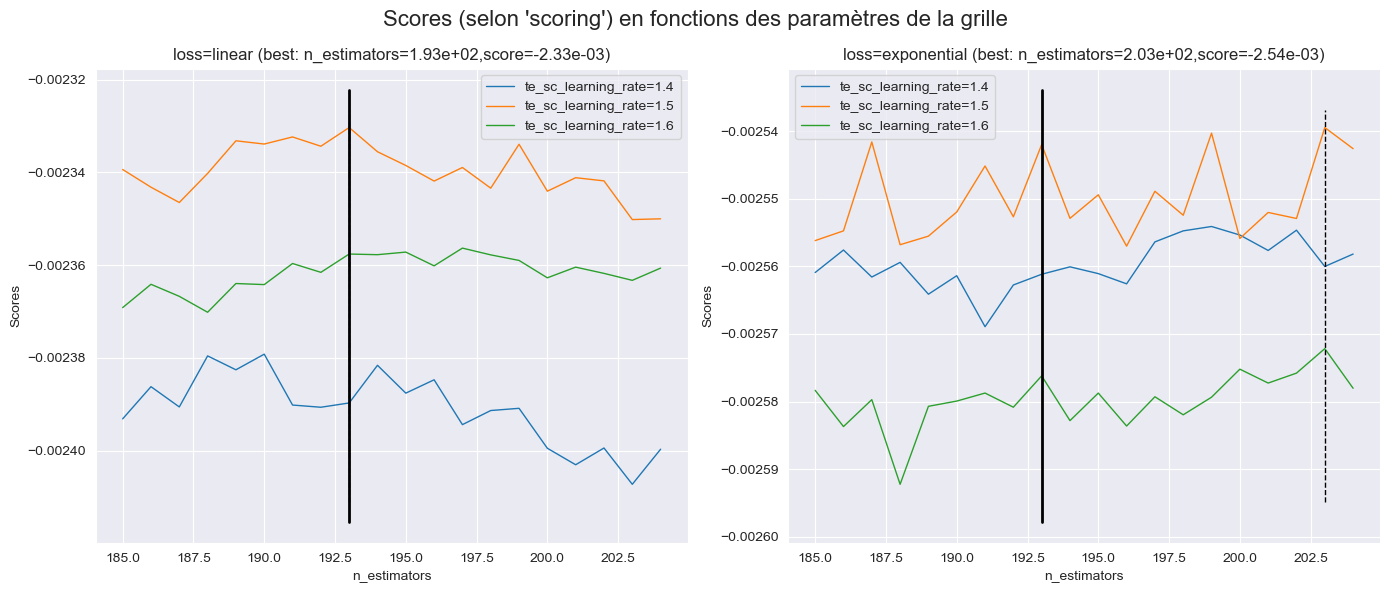

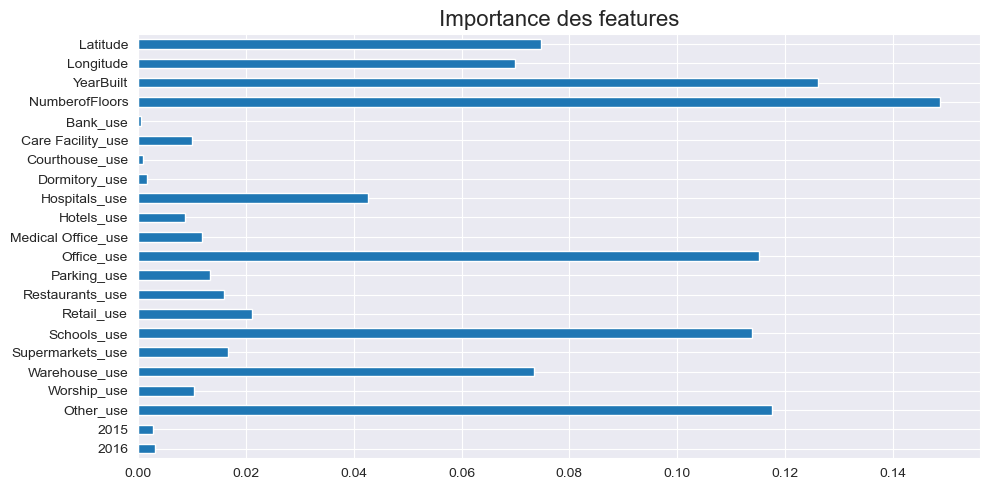

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


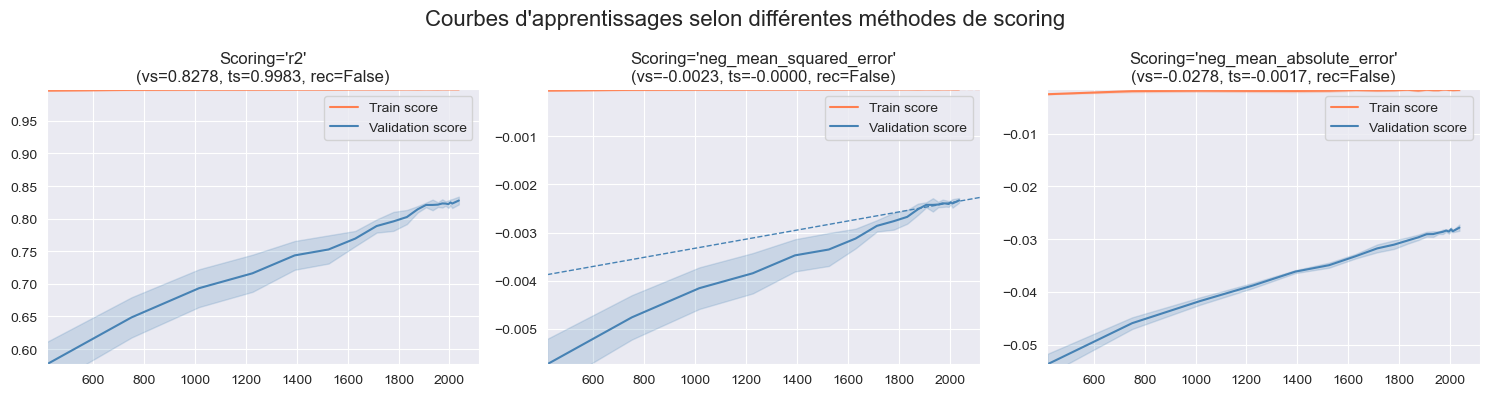



 Modèle : AdaBoostRegressor - TotalGHGEmissions sans ENERGYSTARScore

► Modélisation de TotalGHGEmissions sans ENERGYSTARScore
  → Meilleur modèle = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='auto',
                                                       random_state=0),
                  learning_rate=1.3, loss='exponential', n_estimators=293,
                  random_state=0)
  → Meilleurs paramètres = {'learning_rate': 1.3, 'loss': 'exponential', 'n_estimators': 293}
  → Meilleur score d'entrainement  = -0.0044
  → Temps de recherche = 0:15:35.758228
  → Scores en fonction des paramètres de la grille :


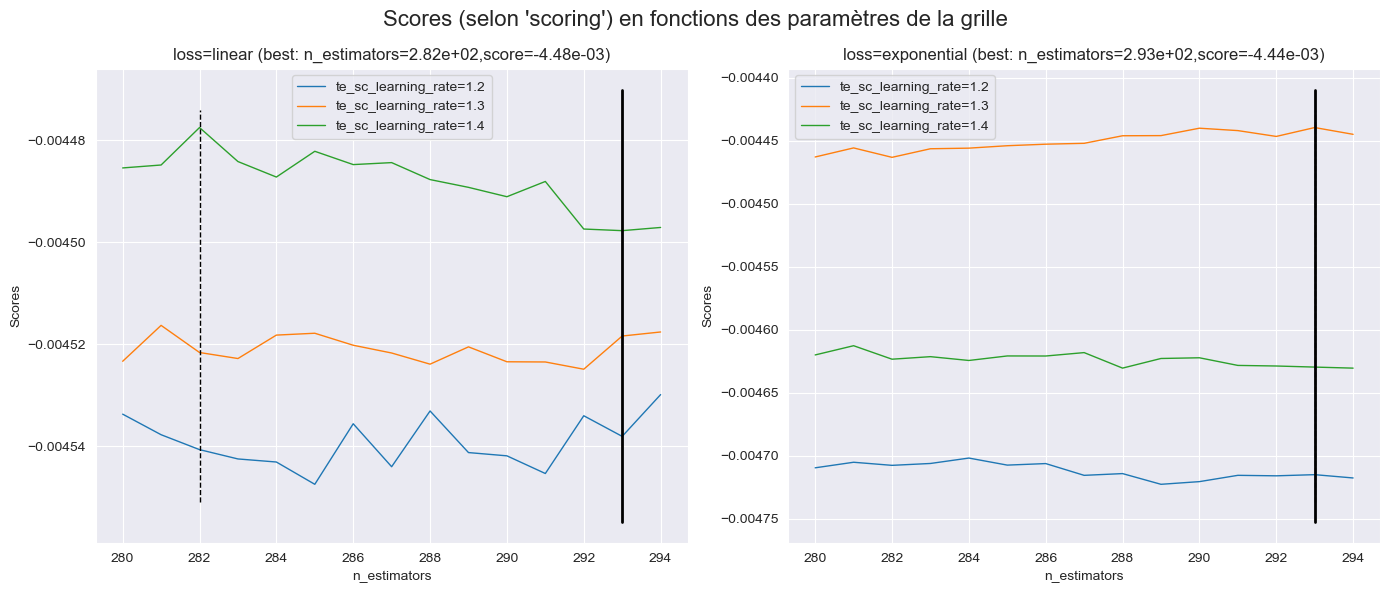

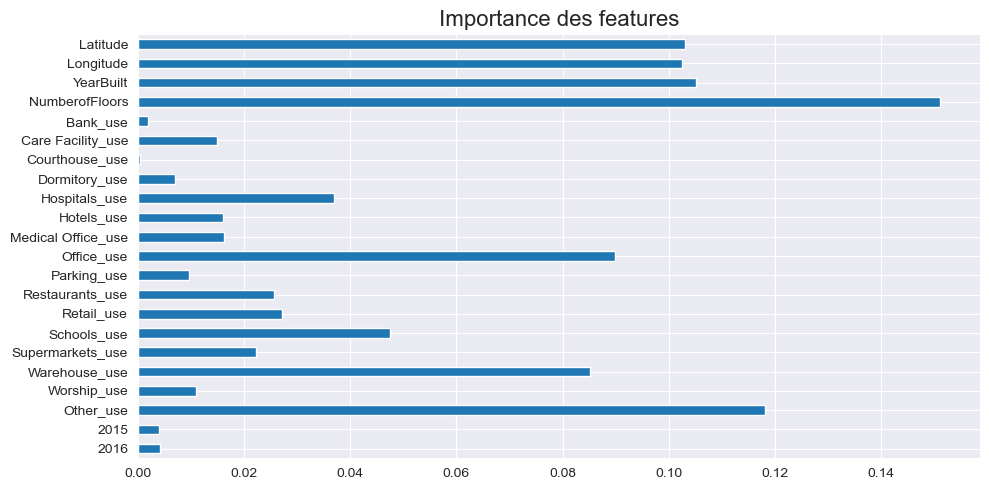

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


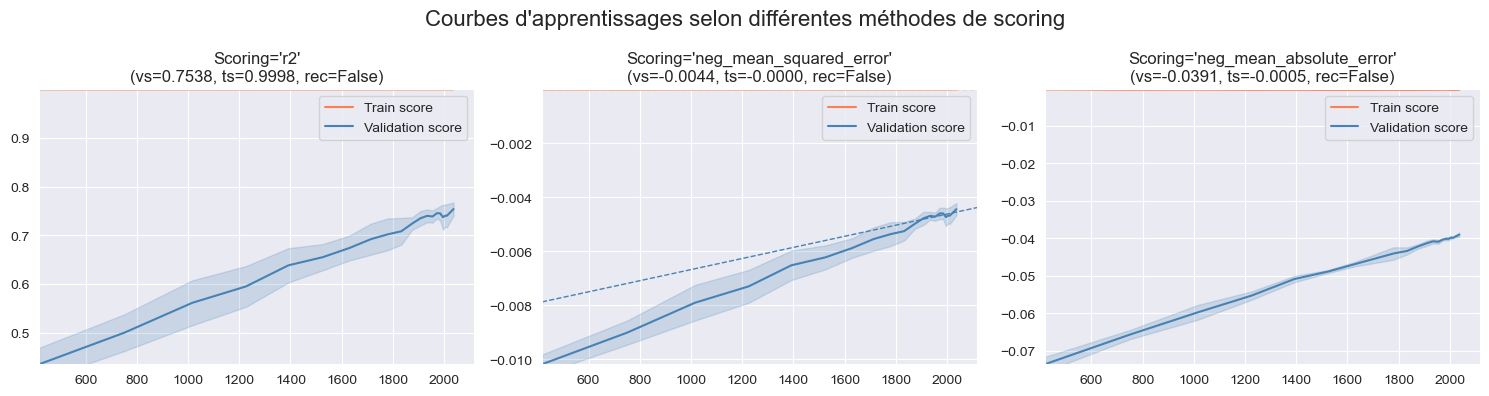



 Modèle : AdaBoostRegressor - TotalGHGEmissions avec ENERGYSTARScore

► Modélisation de TotalGHGEmissions avec ENERGYSTARScore
  → Meilleur modèle = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='auto',
                                                       random_state=0),
                  learning_rate=1.4, loss='exponential', n_estimators=275,
                  random_state=0)
  → Meilleurs paramètres = {'learning_rate': 1.4, 'loss': 'exponential', 'n_estimators': 275}
  → Meilleur score d'entrainement  = -0.0035
  → Temps de recherche = 0:17:37.593375
  → Scores en fonction des paramètres de la grille :


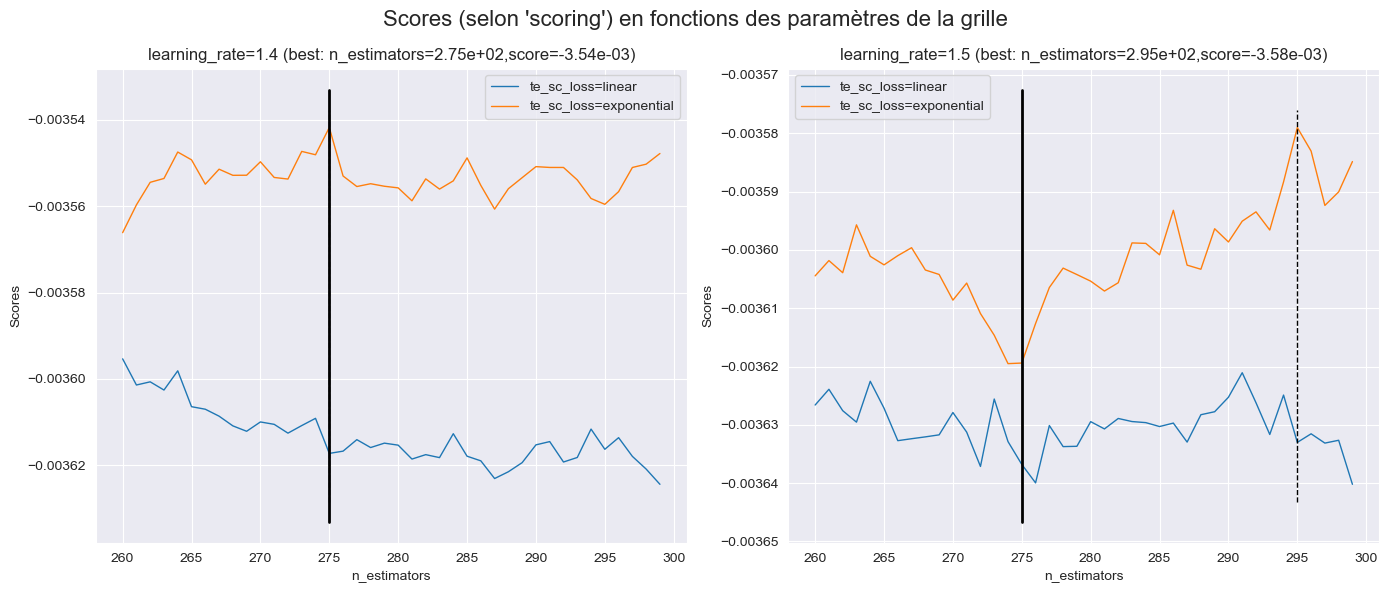

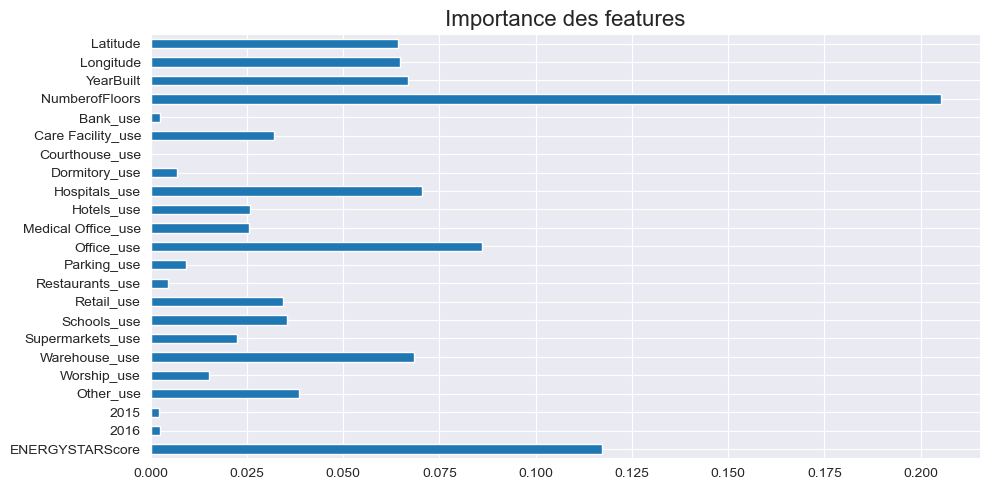

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


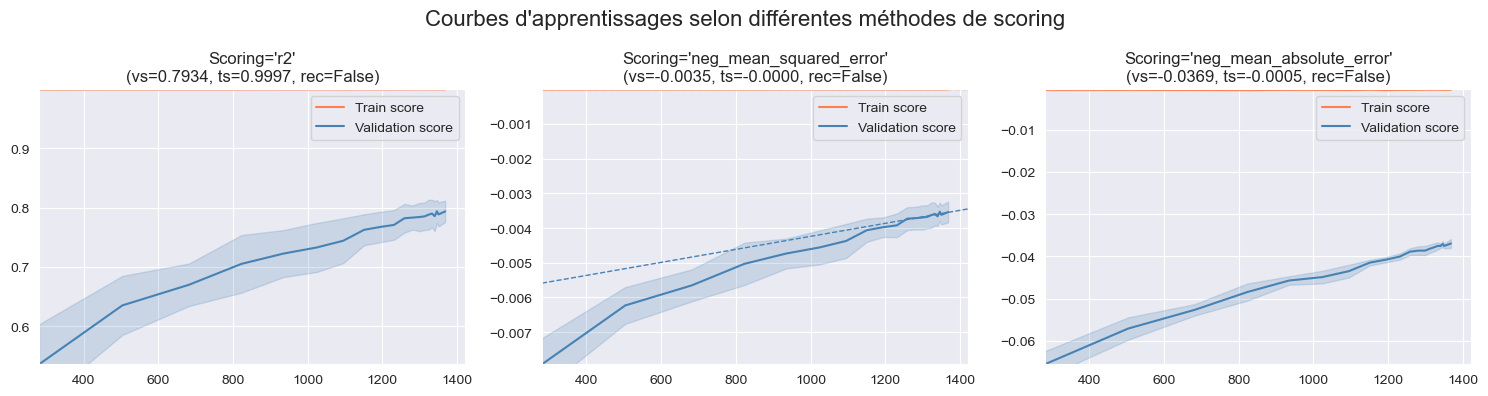

In [16]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Apprenant
be_dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto', random_state=rs, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, ccp_alpha=0.0)
# Modèle
model, model_name = fct.append_model(AdaBoostRegressor(random_state=rs, base_estimator=be_dtr))

# Définition des grilles de recherche
param_grid = {}
param_grid[targets[0]] = {'n_estimators': np.array(range(185, 205)),
                          'learning_rate': [1.4, 1.5, 1.6],
                          'loss': ['linear', 'exponential']}
param_grid[targets[1]] = {'n_estimators': np.array(range(280, 295)),
                          'learning_rate': [1.2, 1.3, 1.4],
                          'loss': ['linear', 'exponential']}
param_grid[targets[2]] = {'n_estimators': np.array(range(260, 300)),
                          'learning_rate': [1.4, 1.5],
                          'loss': ['linear', 'exponential']}
gr = []
result_table = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='n_estimators', scale='linear')
    fct.plot_feature_importance(gr[idx].best_estimator_, f_names[idx])
    result_table.append(fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx]))
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="adaboost_err"></a>
#### 7.2.3 Evaluation de l'erreur du modèle

In [17]:
# Estimation de l'erreur sur la modélisation
print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Estimation de l'erreur du modèle avec {model_name}\n" + Style.RESET_ALL)
err = fct.t_nrj(result_table[0].at[model_name, 'neg_mean_absolute_error'])
print(Fore.GREEN + f"► Erreur (MAE) sur {targets[0]} :" + Style.RESET_ALL, f"{err:.0f}, soit {100*err/fct.mean_nrj:.2f}% de la valeur moyenne")
err = fct.t_ghg(result_table[1].at[model_name, 'neg_mean_absolute_error'])
print(Fore.GREEN + f"► Erreur (MAE) sur {targets[1]} :" + Style.RESET_ALL, f"{err:.3f}, soit {100*err/fct.mean_ghg:.2f}% de la valeur moyenne")



 Estimation de l'erreur du modèle avec AdaBoostRegressor

► Erreur (MAE) sur SiteEnergyUse : 9265, soit 0.12% de la valeur moyenne
► Erreur (MAE) sur TotalGHGEmissions sans ENERGYSTARScore : 0.302, soit 0.17% de la valeur moyenne


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="adaboost_gap"></a>
#### 7.2.2 Exploration de la réduction du gap entre le score d'entrainement et le score de validation
Le gap entre les courbes peut être réduit en :
- diminuant la complexité du modèle (max_depth du DecisionTreeRegressor) ;
- diminuant le nombre de features ;
- augmentant la taille du jeu (sans EnergyStarScore), ce qui requerrait des mesures (données) complémentaires, dont nous ne disposons pas.

Nous explorons donc ici les deux premières pistes en :
- réduisant la complexité de l'apprenant, en jouant sur le paramètre max_depth = 11 ;
- éliminant les features dont le score d'importance est inférieur à feat_thr = 0.01.

L'examen des courbes d'apprentissage montre que la réduction du gap entre les scores d'entrainement et de validation est compensée par l'accroissement de l'erreur du score de validation (cf MAE: réduction du gap de 0.0109 contre augmentation de l'erreur de 0.0106).

Par ailleurs, s'agissant du modèle initial (avant réduction de complexité) :
- le score sur l'échantillon de test est bon ;
- le score de validation est croissant avec un écart type évoluant à la baisse ;
- le niveau d'erreur de la modélisation est tout à fait correct (MAE = 0.0278, soit ...)

Nous préconisons donc de conserver ce modèle.



 Modèle : AdaBoostRegressor (dtr_md=11 & feat_thr=0.01) - SiteEnergyUse

► Modélisation de SiteEnergyUse
  → Meilleur modèle = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=11,
                                                       max_features='auto',
                                                       random_state=0),
                  learning_rate=0.5, loss='exponential', n_estimators=56,
                  random_state=0)
  → Meilleurs paramètres = {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 56}
  → Meilleur score d'entrainement  = -0.0031
  → Temps de recherche = 0:01:55.554437
  → Scores en fonction des paramètres de la grille :


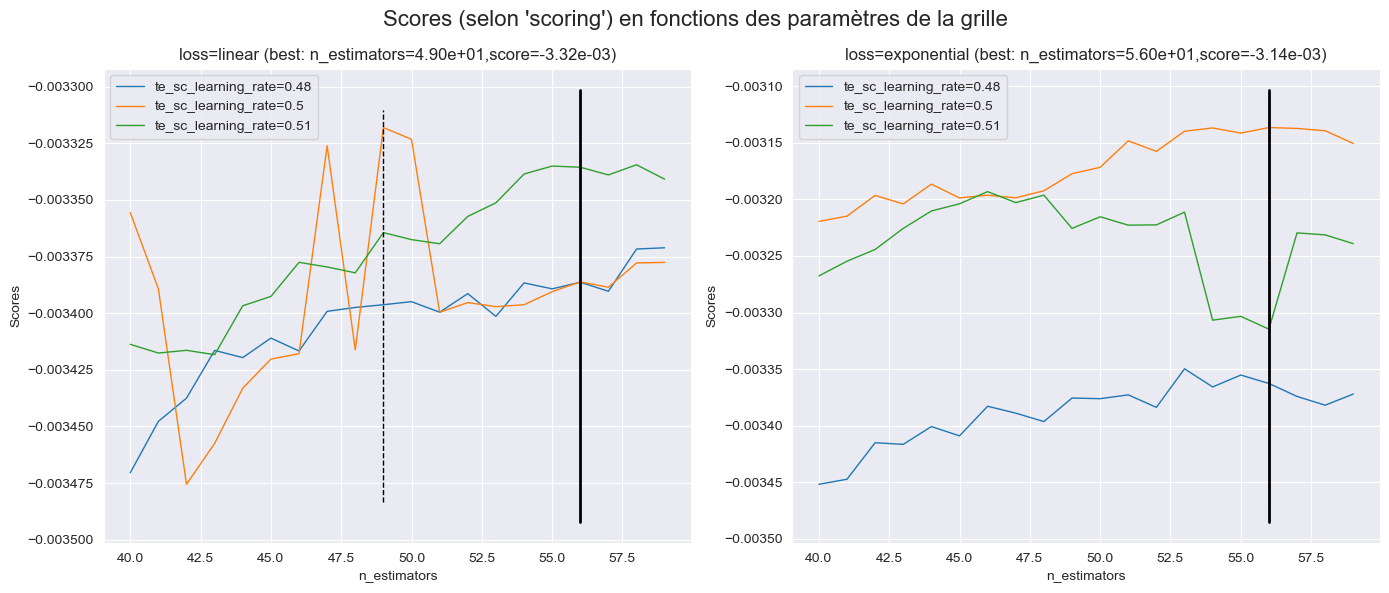

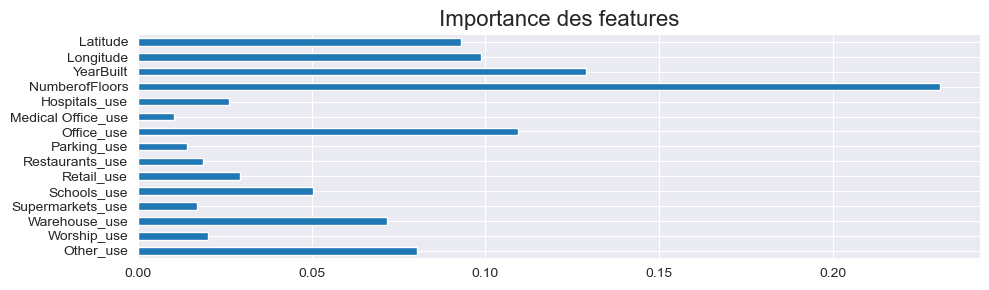

  →  Evaluation sur l'échantillon de test :


  → Courbe d'apprentissage :


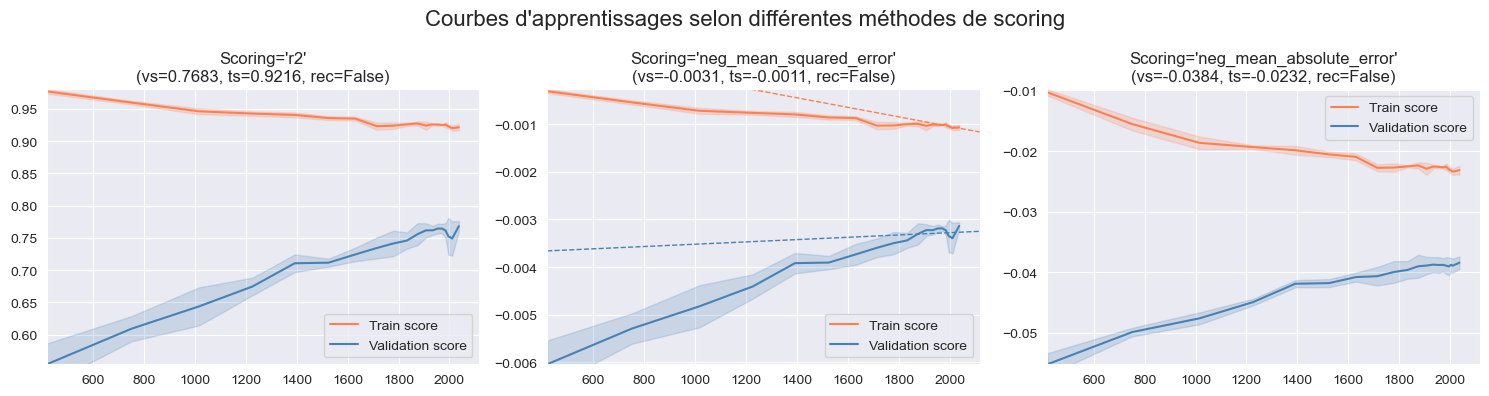



 Modèle : AdaBoostRegressor (dtr_md=11 & feat_thr=0.01) - TotalGHGEmissions sans ENERGYSTARScore



In [ ]:
# Modification de paramètres pour réduire la complexité
max_depth = 11
feat_thr = 0.01

# Apprenant
be_dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=max_depth, min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto', random_state=rs, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, ccp_alpha=0.0)

# Modèle
model, model_name = fct.append_model(AdaBoostRegressor(random_state=rs, base_estimator=be_dtr),
                                     suffix=' (dtr_md='+str(max_depth)+' & feat_thr='+str(feat_thr)+')')

# Définition des grilles de recherche
param_grid = {}
param_grid[targets[0]] = {'n_estimators': np.array(range(40, 60)),
                          'learning_rate': [0.48, 0.5, 0.51],
                          'loss': ['linear', 'exponential']}
param_grid[targets[1]] = {'n_estimators': np.array(range(80, 100)),
                          'learning_rate': [0.6, 0.65, 0.7],
                          'loss': ['linear', 'exponential']}

gr_np = []
for idx in range(2):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)

    # Filtrage des features au-dessous du seuil thr
    mask = np.array(gr[idx].best_estimator_.feature_importances_)
    mask = mask > feat_thr

    gr_np.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr_np[idx] = fct.search_best_model(gr_np[idx], targets[idx], Xtr_list[idx][:, mask], ytr_list[idx])
    fct.plt_grid(gr_np[idx], param_grid[targets[idx]], sort=True, x='n_estimators', scale='linear')
    fct.plot_feature_importance(gr_np[idx].best_estimator_, f_names[idx][mask])
    fct.model_eval(gr_np[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx][:, mask], ytr_list[idx], Xte_list[idx][:, mask], yte_list[idx])
    fct.learning_graph(gr_np[idx].best_estimator_, Xtr_list[idx][:, mask], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="xgboost"></a>
### 7.3 XGBoost
L'utilisation de XGBoost montre à la fois un bon résultat et un temps d'exécution très court. En effet, son score est proche de celui de AdaBoost avec un facteur un temps d'entrainement bien moindre.
Notons en particulier les caractéristiques suivantes de ce modèle :
- Une version de base qui donne une excellente performance (r2=0.89) avec un temps d'apprentissage inférieur à 400ms.
- Une optimisation complexe des paramètres (compte tenu de leur nombre et du processus itératif d'optimisation), qui n'a cependant pas significativement augmenté la performance (passage à r2=0.9).

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
print('Version de XGBoost : ' + xgb.__version__)

model, model_name = fct.append_model(XGBRegressor(objective='reg:squarederror', booster='gbtree', gamma=0, subsample=1,
                                                  min_child_weights=0.8, colsample_bylevels=1, colsample_bynodes=1, max_depth=7,
                                                  reg_alpha = 0.01, reg_lambda=8, random_state=rs, verbosity=0))

# Définition des grilles de recherche
n_estims = np.arange(300, 1000, 10) # nombre d'arbres
learning_rates = np.linspace(0.12, 0.16, 5) # default=0.3 - paramètre sensible

param_grid = {}
param_grid[targets[0]] = {'learning_rate': [0.12, 0.15],
                          'n_estimators': np.arange(600, 1000, 10)}
param_grid[targets[1]] = {'learning_rate': [0.12, 0.14],
                          'n_estimators': np.arange(650, 750, 5)}
param_grid[targets[2]] = {'learning_rate': [0.15, 0.16],
                          'n_estimators': np.arange(500, 600, 5)}

gr = []
for idx in range(3):
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Modèle : {model_name} - {targets[idx]}\n" + Style.RESET_ALL)
    gr.append(GridSearchCV(model, param_grid[targets[idx]], scoring=Scoring, cv=CV, return_train_score=True))
    gr[idx] = fct.search_best_model(gr[idx], targets[idx], Xtr_list[idx], ytr_list[idx])
    fct.plt_grid(gr[idx], param_grid[targets[idx]], sort=True, x='n_estimators', scale='linear')
    fct.plot_feature_importance(gr[idx].best_estimator_, f_names[idx])
    fct.model_eval(gr[idx].best_estimator_, model_name, targets[idx], Xtr_list[idx], ytr_list[idx], Xte_list[idx], yte_list[idx])
    fct.learning_graph(gr[idx].best_estimator_, Xtr_list[idx], ytr_list[idx], scoring=Scoring, random_state=rs)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

## 8 - Bilan et conclusion

<a id="bilan"></a>
### 8.1 Bilan des différents modèles
Le tableau et le graphe associé ci-après donne le résultat de l'évaluation des 10 modèles.
La famille des modèles ensemblistes apportent clairement la meilleure modélisation. En comparaison, les résultats des modèles linéaires montrent que nous ne sommes pas en présence d'un problème linéaire.
Les 2 modèles de la famille des méthodes ensemblistes à boosting de gradient donnent les meilleures performances :
- AdaBoost est à la première place en termes de score ;
- XGBoost a un score très proche avec un temps d'apprentissage de 1.5 à 3.5 fois moindre ;
- les 2 modèles ont un potentiel d'amélioration avec l'apport de nouvelles données (1000 nouvelles données nécessaires pour une augmentation significative) ;
- les 2 modèles permettent de modéliser les émissions en GES sans avoir besoin de l'EnergyStarScore.

Les niveaux d'erreur de ces modélisations montrent un bon niveau de précision pour la modélisation AdaBoost :
- Erreur sur l'évaluation de la consommation d'énergie : avec un MSE de 0.001248, cela correspond à une valeur d'énergie de 17020 kBtu (=exp(ln(11441)+(ln(873923712)-ln(11441))*sqrt(0.001248))), soit 0.21% de la consommation moyenne d'énergie du jeu de données.
- Erreur sur l'évaluation des émissions de GES : avec un MSE de 0.002930, cela correspond à une valeur d'émission de 0.23 MetricTonsCO2e (=0.175 + exp(sqrt(0.002930)*(ln(16871+0.175)-ln(0.175) + ln(0.175)), soit 0.13% de l'émission moyenne de GES du jeu de données.

In [ ]:
for target in targets:
    print("\n\n", Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Comparaison entre les modèles évalués - {target}\n" + Style.RESET_ALL)
    fct.eval_results(target)
    fct.plot_model_comparison(target, subplots=False)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="conclusion"></a>
### 7.2 Conclusion
En réponse à la problématique posée :
- Nous proposons des modèles fiables pour estimer l’énergie consommée et les émissions de GES. En particulier, les modèles exploitent les données de caractéristiques des bâtiments, leur localisation, et sont très peu ou pas sensibles à l'année de mesure des jeux de données.
- Les modèles ne nécessitent pas de disposer de l’“ENERGY STAR Score”.
- Un point d'attention cependant pour la généralisation : elle nécessitera un pré-traitement des données, s’agissant en particulier des surfaces associées aux principales utilisations, afin d’assurer leur cohérence avec les surfaces totales.


[<font color='red'><em>retour sommaire</em></font>](#sommaire)